<a href="https://colab.research.google.com/github/CarloR04/Challenge-Telcom_X/blob/main/Telcom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telcom_X**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

## 📌 **Extracción**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json('/content/drive/MyDrive/Colab_Notebooks/ALURA/Challenge Telcom_X/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
## Para normalizar los datos de JSON anidado

#Importando el módulo JSON
import json

#Leyendo el archivo json usando el módulo Python JSON
with open('/content/drive/MyDrive/Colab_Notebooks/ALURA/Challenge Telcom_X/TelecomX_Data.json','r') as f:
    datos = json.loads(f.read())

df_norm = pd.json_normalize(datos)
pd.set_option('display.max_columns', None) # Para que se muestren el total de columns
df_norm.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 🔧 **Transformación**

### **Analisis Inicial de los Datos**

In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
df_norm.shape

(7267, 21)

In [ ]:
df_norm.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [ ]:
print('--- Verificación de valores nulos (NaN/None) ---')
null_counts = df_norm.isnull().sum()
null_columns = null_counts[null_counts > 0]
if not null_columns.empty:
    print(null_columns)
else:
    print('No hay valores nulos en el DataFrame.')

print('\n--- Verificación de espacios vacíos o solo espacios en columnas de texto ---')
empty_space_found = False
for col in df_norm.select_dtypes(include='object').columns:
    # Comprobar si hay cadenas de text vacías o cadenas con solo espacios en blanco
    empty_spaces = df_norm[df_norm[col].astype(str).str.strip() == ''].shape[0]
    if empty_spaces > 0:
        print(f"Columna '{col}': {empty_spaces} filas con espacios vacíos o solo espacios.")
        empty_space_found = True
if not empty_space_found:
    print('No se encontraron espacios vacíos o solo espacios en columnas de texto.')

--- Verificación de valores nulos (NaN/None) ---
No hay valores nulos en el DataFrame.

--- Verificación de espacios vacíos o solo espacios en columnas de texto ---
Columna 'Churn': 224 filas con espacios vacíos o solo espacios.
Columna 'account.Charges.Total': 11 filas con espacios vacíos o solo espacios.


In [ ]:
df_norm['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [ ]:
df_norm['account.Charges.Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

Realizando el analisis exploratorio inicial identificamos que para la columnas **'Churcn'** hay presencia se espacios vacios, por lo que se deben rellenar para poder obtener un analisis mejor de los datos.

En el caso de la Columana **'account.Charges.Total'** se observan espacios vacios y dytipe incorrecta por lo que se debe colocar el dytipe acorde y rellenar los espacios vacios.  

Ahora analicemos los demás campos:

#### **Strings**

In [ ]:
df_norm.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
3186,4450-MDZFX,No,Male,0,Yes,Yes,60,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),74.35,4453.3
1648,2342-CKIAO,No,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,41.2
3361,4671-VJLCL,No,Female,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),79.85,4861.45
131,0220-EBGCE,Yes,Male,0,No,No,2,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.85,167.3
6107,8348-JLBUG,No,Male,1,Yes,No,64,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,One year,No,Credit card (automatic),80.30,5017.7
3064,4277-BWBML,No,Male,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85
2220,3096-WPXBT,No,Female,0,Yes,Yes,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),100.70,6018.65
6873,9488-FVZCC,No,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),79.50,5661.7
2455,3422-WJOYD,No,Male,0,Yes,No,28,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,54.35,1426.45
1496,2150-UWTFY,Yes,Female,0,Yes,Yes,22,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,No,Mailed check,61.15,1422.05


In [ ]:
## Analizamos para los datos con type object
print(f'Valores unicos customerID: {df_norm['customerID'].unique()} y su tipo de datos es: {df_norm['customerID'].dtype}')
print(f'Valores unicos customer.gender: {df_norm['customer.gender'].unique()} y su tipo de datos es: {df_norm['customer.gender'].dtype}')
print(f'Valores unicos customer.Partner: {df_norm['customer.Partner'].unique()} y su tipo de datos es: {df_norm['customer.Partner'].dtype}')
print(f'Valores unicos customer.Dependents: {df_norm['customer.Dependents'].unique()} y su tipo de datos es: {df_norm['customer.Dependents'].dtype}')
print(f'Valores unicos phone.PhoneService: {df_norm['phone.PhoneService'].unique()} y su tipo de datos es: {df_norm['phone.PhoneService'].dtype}')
print(f'Valores unicos phone.MultipleLines: {df_norm['phone.MultipleLines'].unique()} y su tipo de datos es: {df_norm['phone.MultipleLines'].dtype}')
print(f'Valores unicos internet.InternetService: {df_norm['internet.InternetService'].unique()} y su tipo de datos es: {df_norm['internet.InternetService'].dtype}')
print(f'Valores unicos internet.OnlineSecurity: {df_norm['internet.OnlineSecurity'].unique()} y su tipo de datos es: {df_norm['internet.OnlineSecurity'].dtype}')
print(f'Valores unicos internet.OnlineBackup: {df_norm['internet.OnlineBackup'].unique()} y su tipo de datos es: {df_norm['internet.OnlineBackup'].dtype}')
print(f'Valores unicos internet.DeviceProtection: {df_norm['internet.DeviceProtection'].unique()} y su tipo de datos es: {df_norm['internet.DeviceProtection'].dtype}')
print(f'Valores unicos internet.TechSupport: {df_norm['internet.TechSupport'].unique()} y su tipo de datos es: {df_norm['internet.TechSupport'].dtype}')
print(f'Valores unicos internet.StreamingTV: {df_norm['internet.StreamingTV'].unique()} y su tipo de datos es: {df_norm['internet.StreamingTV'].dtype}')
print(f'Valores unicos internet.StreamingMovies: {df_norm['internet.StreamingMovies'].unique()} y su tipo de datos es: {df_norm['internet.StreamingMovies'].dtype}')
print(f'Valores unicos account.Contract: {df_norm['account.Contract'].unique()} y su tipo de datos es: {df_norm['account.Contract'].dtype}')
print(f'Valores unicos account.PaperlessBilling: {df_norm['account.PaperlessBilling'].unique()} y su tipo de datos es: {df_norm['account.PaperlessBilling'].dtype}')
print(f'Valores unicos account.PaymentMethod: {df_norm['account.PaymentMethod'].unique()} y su tipo de datos es: {df_norm['account.PaymentMethod'].dtype}')


Valores unicos customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH'] y su tipo de datos es: object
Valores unicos customer.gender: ['Female' 'Male'] y su tipo de datos es: object
Valores unicos customer.Partner: ['Yes' 'No'] y su tipo de datos es: object
Valores unicos customer.Dependents: ['Yes' 'No'] y su tipo de datos es: object
Valores unicos phone.PhoneService: ['Yes' 'No'] y su tipo de datos es: object
Valores unicos phone.MultipleLines: ['No' 'Yes' 'No phone service'] y su tipo de datos es: object
Valores unicos internet.InternetService: ['DSL' 'Fiber optic' 'No'] y su tipo de datos es: object
Valores unicos internet.OnlineSecurity: ['No' 'Yes' 'No internet service'] y su tipo de datos es: object
Valores unicos internet.OnlineBackup: ['Yes' 'No' 'No internet service'] y su tipo de datos es: object
Valores unicos internet.DeviceProtection: ['No' 'Yes' 'No internet service'] y su tipo de datos es: object
Valores unicos internet.TechSuppor

In [ ]:
# Si se desea crear un DataFrame donde cada columna contenga los valores únicos (cuidado si las longitudes son diferentes):
# Las casillas se llenaran con datos NaN ya que sus longitudes son diferentes no por que haya datos null en las casillas.

## DF Valores unicos text excepto ID
from itertools import zip_longest
unique_genders = df_norm['customer.gender'].unique()
unique_customer_Partner = df_norm['customer.Partner'].unique()
unique_Dependents = df_norm['customer.Dependents'].unique()
unique_PhoneService = df_norm['phone.PhoneService'].unique()
unique_MultipleLines = df_norm['phone.MultipleLines'].unique()
unique_InternetService = df_norm['internet.InternetService'].unique()
unique_OnlineSecurity = df_norm['internet.OnlineSecurity'].unique()
unique_OnlineBackup = df_norm['internet.OnlineBackup'].unique()
unique_DeviceProtection = df_norm['internet.DeviceProtection'].unique()
unique_TechSupport = df_norm['internet.TechSupport'].unique()
unique_StreamingTV = df_norm['internet.StreamingTV'].unique()
unique_streaming_Movies = df_norm['internet.StreamingMovies'].unique()
unique_Contract = df_norm['account.Contract'].unique()
unique_PaperlessBilling = df_norm['account.PaperlessBilling'].unique()
unique_PaymentMethod = df_norm['account.PaymentMethod'].unique()
Text_unique_df = pd.DataFrame(dict(
      customer_gender_unique = pd.Series(unique_genders).head(4), #Con head(Buscamos definir una longitud igual para todos),
      customer_Partner_unique = pd.Series(unique_customer_Partner),
      Customer_generder_unique =  pd.Series(unique_genders),
      customer_Dependents_unique = pd.Series(unique_Dependents),
      phone_PhoneService_unique = pd.Series(unique_PhoneService),
      phone_MultipleLines_unique = pd.Series(unique_MultipleLines),
      internet_InternetService_unique = pd.Series(unique_InternetService),
      internet_OnlineSecurity_unique = pd.Series(unique_OnlineSecurity),
      internet_OnlineBackup_unique = pd.Series(unique_OnlineBackup),
      internet_DeviceProtection_unique = pd.Series(unique_DeviceProtection),
      internet_TechSupport_unique = pd.Series(unique_TechSupport),
      internet_StreamingTV_unique = pd.Series(unique_StreamingTV),
      internet_StreamingMovies_unique = pd.Series(unique_streaming_Movies),
      account_Contract_unique = pd.Series(unique_Contract),
      account_PaperlessBilling_unique = pd.Series(unique_PaperlessBilling),
      account_PaymentMethod_unique = pd.Series(unique_PaymentMethod)
 ))
display(Text_unique_df)


,customer_gender_unique,customer_Partner_unique,Customer_generder_unique,customer_Dependents_unique,phone_PhoneService_unique,phone_MultipleLines_unique,internet_InternetService_unique,internet_OnlineSecurity_unique,internet_OnlineBackup_unique,internet_DeviceProtection_unique,internet_TechSupport_unique,internet_StreamingTV_unique,internet_StreamingMovies_unique,account_Contract_unique,account_PaperlessBilling_unique,account_PaymentMethod_unique
0,Female,Yes,Female,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check
1,Male,No,Male,No,No,Yes,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,No,Electronic check
2,NaN,NaN,NaN,NaN,NaN,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,NaN,Credit card (automatic)
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bank transfer (automatic)


De este Analisis podemos observar que muchas de las columnas que contiene strings presentan un tercer dato que es similar a solo decir "No" tiene x servicio contrado o incluido. Esto se puede adaptar.

Tambien se puede evaluar si se convierte a Date Time la columna 'account_Contract'.

##### **ID**

In [ ]:
import re

# Definir el patrón de expresión regular: 4 números, guion, 4 letras mayúsculas
pattern = r'^\d{4}-[A-Z]{5}$'

# Aplicar el patrón a la columna 'customerID'
# Creamos una serie booleana que es True si el ID coincide con el patrón, False en caso contrario
matches_pattern = df_norm['customerID'].astype(str).apply(lambda x: bool(re.fullmatch(pattern, x)))

# Contar cuántos IDs cumplen y no cumplen con el formato
num_matching = matches_pattern.sum()
num_non_matching = len(df_norm) - num_matching

print(f"Total de IDs: {len(df_norm)}")
print(f"IDs que cumplen con el formato (4 números-5 letras mayúsculas): {num_matching}")
print(f"IDs que NO cumplen con el formato: {num_non_matching}")

if num_non_matching > 0:
    print("\nEjemplos de IDs que NO cumplen con el formato:")
    display(df_norm[~matches_pattern].head())
else:
    print("\nTodos los IDs cumplen con el formato especificado.")

Total de IDs: 7267
IDs que cumplen con el formato (4 números-5 letras mayúsculas): 7267
IDs que NO cumplen con el formato: 0

Todos los IDs cumplen con el formato especificado.


#### **Númerico**

In [ ]:
## Analizamos para los datos con type númerico
print(f'Valores unicos customer.SeniorCitizen: {df_norm['customer.SeniorCitizen'].unique()} y su tipo de datos es: {df_norm['customer.SeniorCitizen'].dtype}')
print(f'Valores unicos customer.tenure: {df_norm['customer.tenure'].unique()} y su tipo de datos es: {df_norm['customer.tenure'].dtype}')
print(f'Valores unicos account.Charges.Monthly: {df_norm['account.Charges.Monthly'].unique()} y su tipo de datos es: {df_norm['account.Charges.Monthly'].dtype}')

Valores unicos customer.SeniorCitizen: [0 1] y su tipo de datos es: int64
Valores unicos customer.tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0] y su tipo de datos es: int64
Valores unicos account.Charges.Monthly: [65.6  59.9  73.9  ... 91.75 68.8  67.85] y su tipo de datos es: float64


In [ ]:
account_Charges_Montly_unique = df_norm['account.Charges.Monthly'].unique()
account_Charges_Montly_unique


array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

##### **account.Charges.Monthly**

In [ ]:
print(f"Tipo de datos de 'account.Charges.Monthly': {df_norm['account.Charges.Monthly'].dtype}")
print(f"Número de valores nulos en 'account.Charges.Monthly': {df_norm['account.Charges.Monthly'].isnull().sum()}")

# Verificar si todos los valores tienen dos decimales
# Una forma más robusta es convertir a string y verificar la parte decimal.

has_two_decimals = df_norm['account.Charges.Monthly'].apply(lambda x: len(str(x).split('.')[-1]) == 2 if '.' in str(x) else False)

if has_two_decimals.all():
    print("Todos los valores en 'account.Charges.Monthly' tienen exactamente dos decimales.")
else:
    print("Algunos valores en 'account.Charges.Monthly' no tienen exactamente dos decimales.")
    # Mostrar ejemplos de valores que no cumplen con el formato
    print("Ejemplos de valores que no tienen dos decimales:")
    display(df_norm[~has_two_decimals][['customerID', 'account.Charges.Monthly']].head(10))

Tipo de datos de 'account.Charges.Monthly': float64
Número de valores nulos en 'account.Charges.Monthly': 0
Algunos valores en 'account.Charges.Monthly' no tienen exactamente dos decimales.
Ejemplos de valores que no tienen dos decimales:


,customerID,account.Charges.Monthly
0,0002-ORFBO,65.6
1,0003-MKNFE,59.9
2,0004-TLHLJ,73.9
3,0011-IGKFF,98.0
4,0013-EXCHZ,83.9
5,0013-MHZWF,69.4
6,0013-SMEOE,109.7
8,0015-UOCOJ,48.2
10,0017-DINOC,45.2
11,0017-IUDMW,116.8


In [ ]:
df_norm.query('customerID == "0002-ORFBO"')

# O alternativamente, sin usar .query():
# df_norm[df_norm['customerID'] == '0002-ORFBO']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3


In [ ]:
df_norm[df_norm['customerID'] == '7968-QUXNS']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
5824,7968-QUXNS,No,Male,0,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.95,110.15


Para esta Columna se evidencian que hay valores con dos decimales y otros con solo 1 decimal.

##### **account.Charges.Total**

In [ ]:
df_norm['account.Charges.Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [ ]:
print(f"Tipo de datos de 'account.Charges.Total': {df_norm['account.Charges.Total'].dtype}")
print(f"Número de valores nulos en 'account.Charges.Total': {df_norm['account.Charges.Total'].isnull().sum()}")

# Verificar si todos los valores tienen dos decimales
# Una forma más robusta es convertir a string y verificar la parte decimal.

has_two_decimals_ACT = df_norm['account.Charges.Total'].apply(lambda x: len(str(x).split('.')[-1]) == 2 if '.' in str(x) else False)

if has_two_decimals_ACT.all():
    print("Todos los valores en 'account.Charges.Total' tienen exactamente dos decimales.")
else:
    print("Algunos valores en 'account.Charges.Total' no tienen exactamente dos decimales.")
    # Mostrar ejemplos de valores que no cumplen con el formato
    print("Ejemplos de valores que no tienen dos decimales:")
    display(df_norm[~has_two_decimals_ACT][['customerID', 'account.Charges.Total']].head(10))

Tipo de datos de 'account.Charges.Total': object
Número de valores nulos en 'account.Charges.Total': 0
Algunos valores en 'account.Charges.Total' no tienen exactamente dos decimales.
Ejemplos de valores que no tienen dos decimales:


,customerID,account.Charges.Total
0,0002-ORFBO,593.3
1,0003-MKNFE,542.4
4,0013-EXCHZ,267.4
7,0014-BMAQU,5377.8
9,0016-QLJIS,5957.9
12,0018-NYROU,351.5
14,0019-GFNTW,2560.1
15,0020-INWCK,6849.4
16,0020-JDNXP,1993.2
17,0021-IKXGC,72.1


En esta columna sumado a que esta mal su tipo de dato tambine presente irregularidad en cuanto a la cantidad de decimales de su datos.

### **Sintesis Analisis Inicial**

De la evaluación preliminar del df_norm, se tienen los siguientes puntos a trabajar:

- Para algunas columnas type object que contiene strings cambiar la tercera opción a un No ya que la respuesta es similar a esta categoria.
- Para las dos ultimas columnas del df_norm dejar todos los resultados con 2 decimales.
- Para la ultima columna del df corregir su data type.
- Evaluar si la columna del tiempo de contrato se puede convertir a Date time.
- Corregir los espacios vacios de las dos columnas identificadas.

### **Manejo de Incosistencias**

In [ ]:
Data = df_norm.copy()
Data.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
Data.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

#### **String en minisculas**

In [ ]:
# Procemos a menejar todo los Textos en Minisculas a excepción del ID

for col in ['Churn','customer.gender','customer.Partner','customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod' ]:
    if Data[col].dtype == 'object': # Asegurarse de que la columna es tipo objeto (string)
        Data[col] = Data[col].str.lower()

# Verificar los cambios en las primeras filas
display(Data[['Churn','customer.gender','customer.Partner','customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod' ]].head())

,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod
0,no,female,yes,yes,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check
1,no,male,no,no,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check
2,yes,male,no,no,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check
3,yes,male,yes,no,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check
4,yes,female,yes,no,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check


In [ ]:
Data.head(2)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.3
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.4


#### **Si y No**

In [ ]:
# Rellenamos los espacios vacios de Churn por un "no reporta"
Data['Churn'] = Data['Churn'].replace('', 'no reporta')

# Mostramos los valores únicos de la columna Churn después de la limpieza
print("Valores únicos de la columna 'Churn' después de la limpieza:")
print(Data['Churn'].unique())

# Mostramos las filas donde 'Churn' no es 'yes' ni 'no'
print("\nFilas donde 'Churn' es diferente de 'yes' y 'no':")
display(Data[(Data['Churn'] != 'yes') & (Data['Churn'] != 'no')].head())

Valores únicos de la columna 'Churn' después de la limpieza:
['no' 'yes' 'no reporta']

Filas donde 'Churn' es diferente de 'yes' y 'no':


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,no reporta,female,0,no,no,11,yes,yes,fiber optic,yes,no,no,no,no,no,month-to-month,yes,bank transfer (automatic),79.00,929.3
75,0120-YZLQA,no reporta,male,0,no,no,71,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,two year,yes,credit card (automatic),19.90,1355.1
96,0154-QYHJU,no reporta,male,0,no,no,29,yes,no,dsl,yes,yes,no,yes,no,no,one year,yes,electronic check,58.75,1696.2
98,0162-RZGMZ,no reporta,female,1,no,no,5,yes,no,dsl,yes,yes,no,yes,no,no,month-to-month,no,credit card (automatic),59.90,287.85
175,0274-VVQOQ,no reporta,male,1,yes,no,65,yes,yes,fiber optic,no,yes,yes,no,yes,yes,one year,yes,bank transfer (automatic),103.15,6792.45


In [ ]:
#Remplazamos
#"no phone service" por solo "no"
Data['phone.MultipleLines'] = Data['phone.MultipleLines'].replace('no phone service', 'no')
# "no internet service" por solo "no"
Data['internet.OnlineSecurity'] = Data['internet.OnlineSecurity'].replace('no internet service', 'no')
Data['internet.OnlineBackup'] = Data['internet.OnlineBackup'].replace('no internet service', 'no')
Data['internet.DeviceProtection'] = Data['internet.DeviceProtection'].replace('no internet service', 'no')
Data['internet.TechSupport'] = Data['internet.TechSupport'].replace('no internet service', 'no')
Data['internet.StreamingTV'] = Data['internet.StreamingTV'].replace('no internet service', 'no')
Data['internet.StreamingMovies'] = Data['internet.StreamingMovies'].replace('no internet service', 'no')


# Mostramos los valores únicos de las columnas después del remplazo
print("Valores únicos de la columna 'phone.MultipleLines' después del remplazo:")
print(Data['phone.MultipleLines'].unique())

print("Valores únicos de la columna 'internet.OnlineBackup' después del remplazo:")
print(Data['internet.OnlineBackup'].unique())

print("Valores únicos de la columna 'internet.DeviceProtection' después del remplazo:")
print(Data['internet.DeviceProtection'].unique())

print("Valores únicos de la columna 'internet.TechSupport' después del remplazo:")
print(Data['internet.TechSupport'].unique())

print("Valores únicos de la columna 'internet.StreamingTV' después del remplazo:")
print(Data['internet.StreamingTV'].unique())

print("Valores únicos de la columna 'internet.StreamingMovies' después del remplazo:")
print(Data['internet.StreamingMovies'].unique())



Valores únicos de la columna 'phone.MultipleLines' después del remplazo:
['no' 'yes']
Valores únicos de la columna 'internet.OnlineBackup' después del remplazo:
['yes' 'no']
Valores únicos de la columna 'internet.DeviceProtection' después del remplazo:
['no' 'yes']
Valores únicos de la columna 'internet.TechSupport' después del remplazo:
['yes' 'no']
Valores únicos de la columna 'internet.StreamingTV' después del remplazo:
['yes' 'no']
Valores únicos de la columna 'internet.StreamingMovies' después del remplazo:
['no' 'yes']


In [ ]:
## DF Valores unicos luego del remplazo
from itertools import zip_longest
unique_customer_Partner = Data['customer.Partner'].unique()
unique_Dependents = Data['customer.Dependents'].unique()
unique_PhoneService = Data['phone.PhoneService'].unique()
unique_MultipleLines = Data['phone.MultipleLines'].unique()
unique_OnlineSecurity = Data['internet.OnlineSecurity'].unique()
unique_OnlineBackup = Data['internet.OnlineBackup'].unique()
unique_DeviceProtection = Data['internet.DeviceProtection'].unique()
unique_TechSupport = Data['internet.TechSupport'].unique()
unique_StreamingTV = Data['internet.StreamingTV'].unique()
unique_streaming_Movies = Data['internet.StreamingMovies'].unique()

Text_unique_df = pd.DataFrame(dict(
      customer_Partner_unique = pd.Series(unique_customer_Partner),
      customer_Dependents_unique = pd.Series(unique_Dependents),
      phone_PhoneService_unique = pd.Series(unique_PhoneService),
      phone_MultipleLines_unique = pd.Series(unique_MultipleLines),
      internet_OnlineSecurity_unique = pd.Series(unique_OnlineSecurity),
      internet_OnlineBackup_unique = pd.Series(unique_OnlineBackup),
      internet_DeviceProtection_unique = pd.Series(unique_DeviceProtection),
      internet_TechSupport_unique = pd.Series(unique_TechSupport),
      internet_StreamingTV_unique = pd.Series(unique_StreamingTV),
      internet_StreamingMovies_unique = pd.Series(unique_streaming_Movies),
 ))
display(Text_unique_df)


,customer_Partner_unique,customer_Dependents_unique,phone_PhoneService_unique,phone_MultipleLines_unique,internet_OnlineSecurity_unique,internet_OnlineBackup_unique,internet_DeviceProtection_unique,internet_TechSupport_unique,internet_StreamingTV_unique,internet_StreamingMovies_unique
0,yes,yes,yes,no,no,yes,no,yes,yes,no
1,no,no,no,yes,yes,no,yes,no,no,yes


#### **account.Charges.Monthly**

In [ ]:
import numpy as np

In [ ]:
# Primero, asegúrate de que la columna sea numérica (float)
Data['account.Charges.Monthly'] = pd.to_numeric(Data['account.Charges.Monthly'])

# Ahora, redondea a dos decimales y convierte a string para asegurar el formato de dos decimales en la representación
Data['account.Charges.Monthly'] = Data['account.Charges.Monthly'].apply(lambda x: f"{x:.2f}")
Data['account.Charges.Monthly'].head()


,account.Charges.Monthly
0,65.60
1,59.90
2,73.90
3,98.00
4,83.90


In [ ]:
Data['account.Charges.Monthly'] = Data['account.Charges.Monthly'].astype(np.float64)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#### **account.Charges.Total**

In [ ]:
# Reemplazar cadenas vacías con NaN
Data['account.Charges.Total'] = Data['account.Charges.Total'].replace(r'^\s*$', np.nan, regex=True)
# Convertir a numérico (float)
Data['account.Charges.Total'] = pd.to_numeric(Data['account.Charges.Total'])
# Redondear a dos decimales
Data['account.Charges.Total'] = Data['account.Charges.Total'].round(2)

Data['account.Charges.Total'].tail()


,account.Charges.Total
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65
7266,3707.60


#### **Renombrar Columnas**

In [ ]:
Data = Data.rename(columns={
    'customerID': 'ID_cliente',
    'Churn': 'Permanencia',
    'customer.gender': 'Genero_cliente',
    'customer.SeniorCitizen': 'Cliente_Tercera_Edad',
    'customer.Partner': 'Pareja_Cliente',
    'customer.Dependents': 'Dependientes_del_Cliente',
    'customer.tenure': 'Meses_del_Contrato',
    'phone.PhoneService': 'Servicio_telefonico',
    'phone.MultipleLines': 'Multiples_lineas_telefonicas',
    'internet.InternetService': 'Sus_Internet',
    'internet.OnlineSecurity': 'Sus_Seguridad_online',
    'internet.OnlineBackup': 'Sus_Respaldo_online',
    'internet.DeviceProtection': 'Sus_Protección_al_Dispositivo',
    'internet.TechSupport': 'Sus_Soporte_Técnico',
    'internet.StreamingTV': 'Sus_Tv_por_cable',
    'internet.StreamingMovies': 'sus_streaming_movies',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Preferencia_Factura',
    'account.PaymentMethod': 'Metodo_de_Pago',
    'account.Charges.Monthly': 'Gasto_Mensual',
    'account.Charges.Total': 'Gasto_Total'
})
print("Nombres de las columnas actualizados:")
print(Data.columns)

Nombres de las columnas actualizados:
Index(['ID_cliente', 'Permanencia', 'Genero_cliente', 'Cliente_Tercera_Edad',
       'Pareja_Cliente', 'Dependientes_del_Cliente', 'Meses_del_Contrato',
       'Servicio_telefonico', 'Multiples_lineas_telefonicas', 'Sus_Internet',
       'Sus_Seguridad_online', 'Sus_Respaldo_online',
       'Sus_Protección_al_Dispositivo', 'Sus_Soporte_Técnico',
       'Sus_Tv_por_cable', 'sus_streaming_movies', 'Tipo_Contrato',
       'Preferencia_Factura', 'Metodo_de_Pago', 'Gasto_Mensual',
       'Gasto_Total'],
      dtype='object')


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID_cliente                     7267 non-null   object 
 1   Permanencia                    7267 non-null   object 
 2   Genero_cliente                 7267 non-null   object 
 3   Cliente_Tercera_Edad           7267 non-null   int64  
 4   Pareja_Cliente                 7267 non-null   object 
 5   Dependientes_del_Cliente       7267 non-null   object 
 6   Meses_del_Contrato             7267 non-null   int64  
 7   Servicio_telefonico            7267 non-null   object 
 8   Multiples_lineas_telefonicas   7267 non-null   object 
 9   Sus_Internet                   7267 non-null   object 
 10  Sus_Seguridad_online           7267 non-null   object 
 11  Sus_Respaldo_online            7267 non-null   object 
 12  Sus_Protección_al_Dispositivo  7267 non-null   o

### **Nuevas columnas**

In [ ]:
Data[['Gasto_Mensual','Gasto_Total']].head()

,Gasto_Mensual,Gasto_Total
0,65.6,593.30
1,59.9,542.40
2,73.9,280.85
3,98.0,1237.85
4,83.9,267.40


#### **Cuentas Diarias**

In [ ]:
Data['Cuentas_Diarias'] = Data['Gasto_Mensual']/30
Data['Cuentas_Diarias'] = Data['Cuentas_Diarias'].round(2)
#Se toma 30 dias por el valor mensual calendario para facturación
Data['Cuentas_Diarias'].head()

,Cuentas_Diarias
0,2.19
1,2.00
2,2.46
3,3.27
4,2.80


### **Estandarización Binaria**

In [ ]:
Data_2 = Data.copy()
Data_2.head(3)

,ID_cliente,Permanencia,Genero_cliente,Cliente_Tercera_Edad,Pareja_Cliente,Dependientes_del_Cliente,Meses_del_Contrato,Servicio_telefonico,Multiples_lineas_telefonicas,Sus_Internet,Sus_Seguridad_online,Sus_Respaldo_online,Sus_Protección_al_Dispositivo,Sus_Soporte_Técnico,Sus_Tv_por_cable,sus_streaming_movies,Tipo_Contrato,Preferencia_Factura,Metodo_de_Pago,Gasto_Mensual,Gasto_Total,Cuentas_Diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.19
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.46


In [ ]:
## Convertimos todos los valores si y no en Binarios.
## Donde 1=yes 0=no

Data_2['Permanencia'] = Data_2['Permanencia'].replace('yes', 1)
Data_2['Permanencia'] = Data_2['Permanencia'].replace('no', 0)

Data_2['Pareja_Cliente'] = Data_2['Pareja_Cliente'].replace('yes', 1)
Data_2['Pareja_Cliente'] = Data_2['Pareja_Cliente'].replace('no', 0)

Data_2['Dependientes_del_Cliente'] = Data_2['Dependientes_del_Cliente'].replace('yes', 1)
Data_2['Dependientes_del_Cliente'] = Data_2['Dependientes_del_Cliente'].replace('no', 0)

Data_2['Servicio_telefonico'] = Data_2['Servicio_telefonico'].replace('yes', 1)
Data_2['Servicio_telefonico'] = Data_2['Servicio_telefonico'].replace('no', 0)

Data_2['Multiples_lineas_telefonicas'] = Data_2['Multiples_lineas_telefonicas'].replace('yes', 1)
Data_2['Multiples_lineas_telefonicas'] = Data_2['Multiples_lineas_telefonicas'].replace('no', 0)

Data_2['Sus_Seguridad_online'] = Data_2['Sus_Seguridad_online'].replace('yes', 1)
Data_2['Sus_Seguridad_online'] = Data_2['Sus_Seguridad_online'].replace('no', 0)

Data_2['Sus_Respaldo_online'] = Data_2['Sus_Respaldo_online'].replace('yes', 1)
Data_2['Sus_Respaldo_online'] = Data_2['Sus_Respaldo_online'].replace('no', 0)

Data_2['Sus_Protección_al_Dispositivo'] = Data_2['Sus_Protección_al_Dispositivo'].replace('yes', 1)
Data_2['Sus_Protección_al_Dispositivo'] = Data_2['Sus_Protección_al_Dispositivo'].replace('no', 0)

Data_2['Sus_Soporte_Técnico'] = Data_2['Sus_Soporte_Técnico'].replace('yes', 1)
Data_2['Sus_Soporte_Técnico'] = Data_2['Sus_Soporte_Técnico'].replace('no', 0)

Data_2['Sus_Tv_por_cable'] = Data_2['Sus_Tv_por_cable'].replace('yes', 1)
Data_2['Sus_Tv_por_cable'] = Data_2['Sus_Tv_por_cable'].replace('no', 0)

Data_2['sus_streaming_movies'] = Data_2['sus_streaming_movies'].replace('yes', 1)
Data_2['sus_streaming_movies'] = Data_2['sus_streaming_movies'].replace('no', 0)

Data_2['Preferencia_Factura'] = Data_2['Preferencia_Factura'].replace('yes', 1)
Data_2['Preferencia_Factura'] = Data_2['Preferencia_Factura'].replace('no' , 0)

/tmp/ipython-input-660295978.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-660295978.py:11: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-660295978.py:14: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-660295978.py:17: FutureWarning:

Downcas

In [ ]:
Data_2.head(3)

,ID_cliente,Permanencia,Genero_cliente,Cliente_Tercera_Edad,Pareja_Cliente,Dependientes_del_Cliente,Meses_del_Contrato,Servicio_telefonico,Multiples_lineas_telefonicas,Sus_Internet,Sus_Seguridad_online,Sus_Respaldo_online,Sus_Protección_al_Dispositivo,Sus_Soporte_Técnico,Sus_Tv_por_cable,sus_streaming_movies,Tipo_Contrato,Preferencia_Factura,Metodo_de_Pago,Gasto_Mensual,Gasto_Total,Cuentas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,0,0,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.46


In [ ]:
Data_2['Preferencia_Factura'] = Data_2['Preferencia_Factura'].rename('Factura_Electronica')

## 📊 **Carga y análisis**

In [ ]:
Data[['Meses_del_Contrato','Gasto_Mensual','Gasto_Total','Cuentas_Diarias']].describe().round(2)

,Meses_del_Contrato,Gasto_Mensual,Gasto_Total,Cuentas_Diarias
count,7267.00,7267.00,7256.00,7267.00
mean,32.35,64.72,2280.63,2.16
std,24.57,30.13,2268.63,1.00
min,0.00,18.25,18.80,0.61
25%,9.00,35.42,400.22,1.18
50%,29.00,70.30,1391.00,2.34
75%,55.00,89.88,3785.30,3.00
max,72.00,118.75,8684.80,3.96


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **Variables Categoricas**

#### **Distribución Permanencia Clientes**

In [ ]:
Data_2['Permanencia'].value_counts()

,count
Permanencia,
0,5174
1,1869
no reporta,224


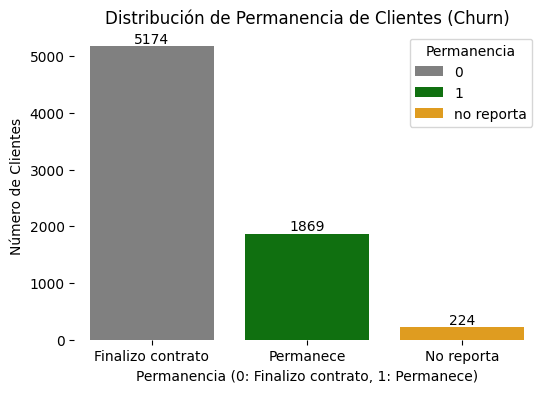

In [ ]:
plt.figure(figsize=(6, 4))
custom_palette = {0: 'gray', 1: 'green', 'no reporta': 'orange'}
ax = sns.countplot(x='Permanencia', data=Data_2, hue='Permanencia', palette=custom_palette)
plt.title('Distribución de Permanencia de Clientes (Churn)')
plt.xlabel('Permanencia (0: Finalizo contrato, 1: Permanece)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1, 2], labels=['Finalizo contrato', 'Permanece', 'No reporta'])

# Añadir el total encima de cada barra
for container in ax.containers:
    for patch in container.patches:
        # patch.get_height() obtiene el valor y (el conteo)
        # patch.get_x() y patch.get_width() para la posición x
        # patch.get_height() para la posición y (justo encima de la barra)
        ax.annotate(f'{int(patch.get_height())}',
                    (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                    ha='center', va='bottom',
                    color='black', fontsize=10)

plt.box(False) # Quitar el marco del gráfico
plt.show()

#### **Distribución Por Género**

In [ ]:
Evasión_x_Genero = Data.groupby(['Genero_cliente', 'Permanencia'])['Permanencia'].count().reset_index(name='Conteo')
Evasión_x_Genero

,Genero_cliente,Permanencia,Conteo
0,female,no,2549
1,female,no reporta,104
2,female,yes,939
3,male,no,2625
4,male,no reporta,120
5,male,yes,930


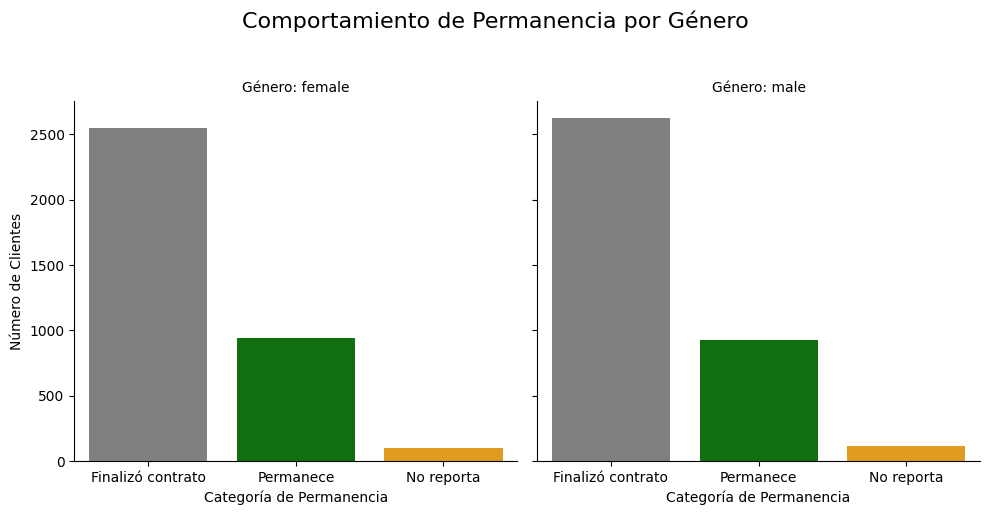

In [ ]:
# Ahora renombramos la columna del índice
Evasión_x_Genero.columns = ['Genero_cliente', 'Continuación_Contrato', 'Conteo']

# Definimos el orden para las categorías de 'Continuación_Contrato' en el eje X
permanencia_order = ['no', 'yes', 'no reporta']

# Definimos una paleta de colores personalizada
custom_palette = {'no': 'gray', 'yes': 'green', 'no reporta': 'orange'}

# Creamos el gráfico categórico con facetas para cada género
g = sns.catplot(
    data=Evasión_x_Genero,
    x='Continuación_Contrato',
    y='Conteo',
    col='Genero_cliente', # Esto crea subgráficos separados para cada género
    kind='bar',
    height=5, # Altura de cada barra
    aspect=1, # Relación de aspecto de cada barra
    order=permanencia_order, # Establece el orden de las categorías en el eje X
    hue='Continuación_Contrato',
    palette=custom_palette, # Aplicamos la paleta de colores personalizada
    legend=False # Ocultamos la leyenda ya que los colores son explicados por las etiquetas del eje x
)

# Configuramos los títulos y etiquetas
g.set_axis_labels("Categoría de Permanencia", "Número de Clientes")
g.set_titles("Género: {col_name}")
# Mapeamos 'no', 'yes', 'no reporta' a etiquetas más descriptivas para el eje X
g.set_xticklabels(['Finalizó contrato', 'Permanece', 'No reporta'])
plt.suptitle('Comportamiento de Permanencia por Género', y=1.02, fontsize=16) # Título general
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta el diseño para evitar la superposición del título general
plt.show()

#### **Distribución Por Tipo de Contrato**

In [ ]:
Data['Tipo_Contrato'].unique()

array(['one year', 'month-to-month', 'two year'], dtype=object)

In [ ]:
Evasión_x_TC = Data.groupby(['Tipo_Contrato','Permanencia'])['Permanencia'].count().reset_index(name='Conteo')
Evasión_x_TC

,Tipo_Contrato,Permanencia,Conteo
0,month-to-month,no,2220
1,month-to-month,no reporta,130
2,month-to-month,yes,1655
3,one year,no,1307
4,one year,no reporta,46
5,one year,yes,166
6,two year,no,1647
7,two year,no reporta,48
8,two year,yes,48


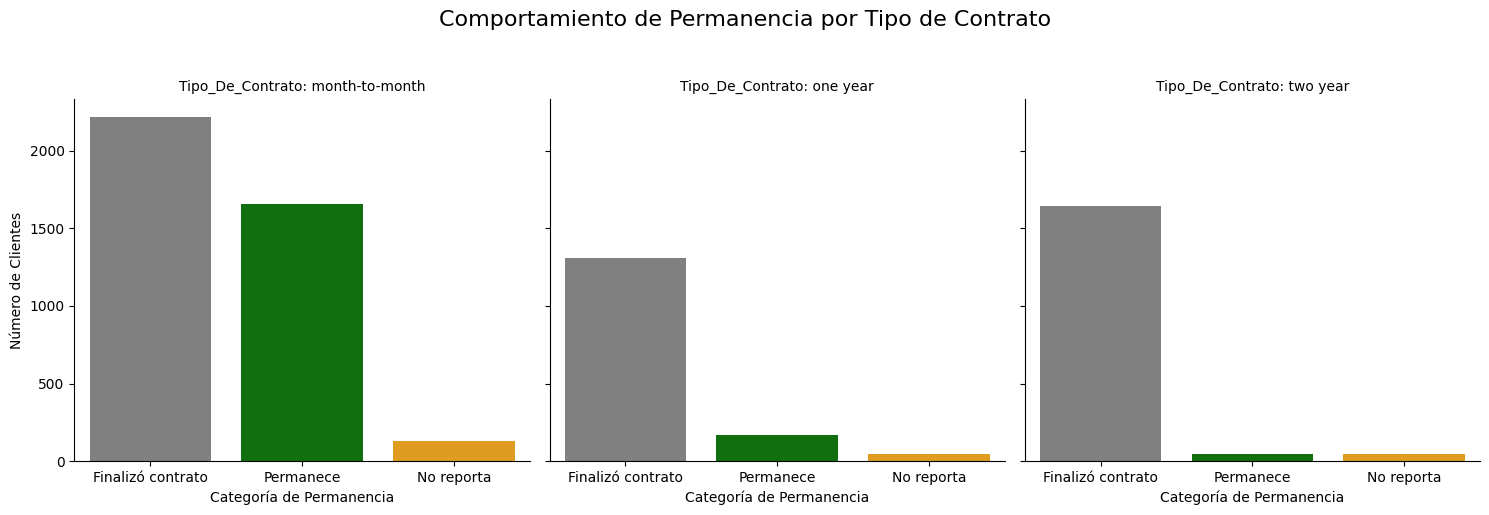

In [ ]:
# Ahora renombramos la columna del groupby
Evasión_x_TC.columns = ['Tipo_De_Contrato', 'Continuación_Del_Servicio', 'Total']

# Definimos el orden para las categorías de 'Continuación_Del_Servico' en el eje X
permanencia_order = ['no', 'yes', 'no reporta']

# Definimos una paleta de colores personalizada
custom_palette = {'no': 'gray', 'yes': 'green', 'no reporta': 'orange'}

# Creamos el gráfico categórico con facetas para cada Tipo de Contrato
g = sns.catplot(
    data=Evasión_x_TC,
    x='Continuación_Del_Servicio',
    y='Total',
    col='Tipo_De_Contrato', # Esto crea subgráficos separados para cada género
    kind='bar',
    height=5, # Altura de cada barra
    aspect=1, # Relación de aspecto de cada barra
    order=permanencia_order, # Establece el orden de las categorías en el eje X
    hue='Continuación_Del_Servicio', # Asignamos 'Continuación_Del_Servicio' al hue para aplicar la paleta
    palette=custom_palette, # Aplicamos la paleta de colores personalizada
    legend=False # Ocultamos la leyenda ya que los colores son explicados por las etiquetas del eje x
)

# Configuramos los títulos y etiquetas
g.set_axis_labels("Categoría de Permanencia", "Número de Clientes")
g.set_titles("Tipo_De_Contrato: {col_name}")
# Mapeamos 'no', 'yes', 'no reporta' a etiquetas más descriptivas para el eje X
g.set_xticklabels(['Finalizó contrato', 'Permanece', 'No reporta'])
plt.suptitle('Comportamiento de Permanencia por Tipo de Contrato', y=1.02, fontsize=16) # Título general
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta el diseño para evitar la superposición del título general
plt.show()

#### **Distribución Por Método de pago**

In [ ]:
Data['Metodo_de_Pago'].unique()

array(['mailed check', 'electronic check', 'credit card (automatic)',
       'bank transfer (automatic)'], dtype=object)

In [ ]:
Evasión_x_MP = Data.groupby(['Metodo_de_Pago','Permanencia'])['Permanencia'].count().reset_index(name='Conteo')
Evasión_x_MP

,Metodo_de_Pago,Permanencia,Conteo
0,bank transfer (automatic),no,1286
1,bank transfer (automatic),no reporta,45
2,bank transfer (automatic),yes,258
3,credit card (automatic),no,1290
4,credit card (automatic),no reporta,46
5,credit card (automatic),yes,232
6,electronic check,no,1294
7,electronic check,no reporta,80
8,electronic check,yes,1071
9,mailed check,no,1304


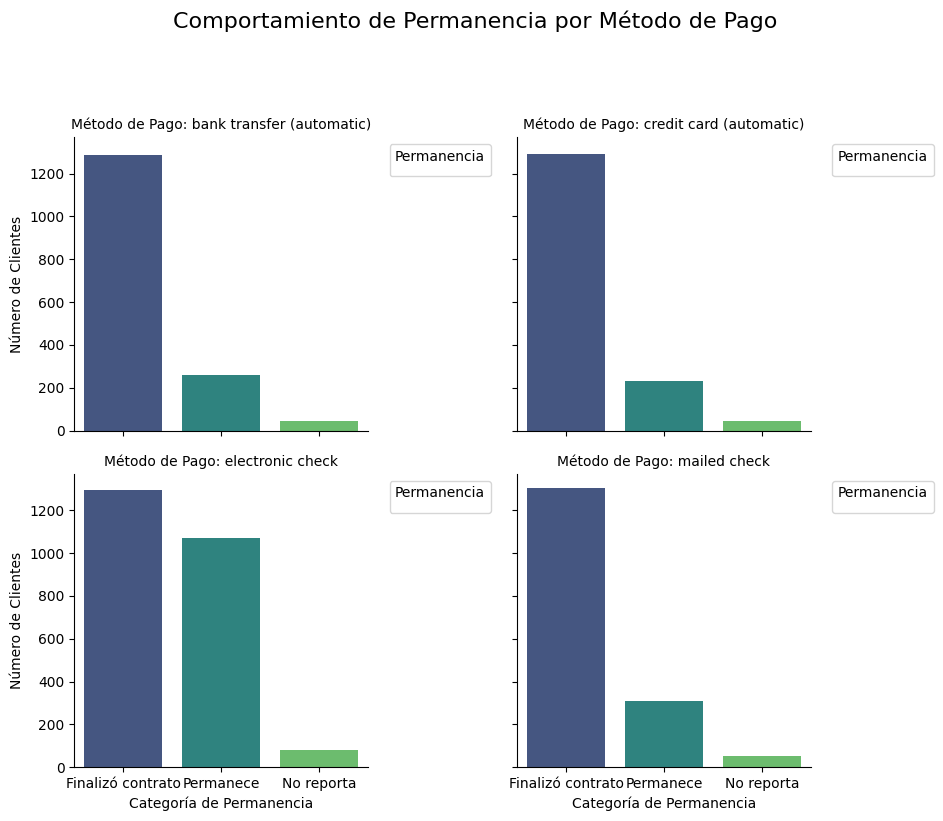

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos el orden para las categorías de 'Permanencia' en el eje X y para el hue
permanencia_order = ['no', 'yes', 'no reporta']

# Definimos una paleta de colores personalizada
custom_palette = {'no': 'gray', 'yes': 'green', 'no reporta': 'orange'}

# Creamos el gráfico categórico con facetas para cada método de pago
g = sns.catplot(
    data=Evasión_x_MP,
    x='Permanencia',
    y='Conteo',
    col='Metodo_de_Pago', # Esto crea subgráficos separados para cada método de pago
    kind='bar',
    height=4, # Altura de cada barra
    aspect=1.2, # Relación de aspecto de cada barra
    order=permanencia_order, # Establece el orden de las categorías en el eje X
    hue='Permanencia', # Colorea las barras según la permanencia
    hue_order=permanencia_order, # Establece el orden de los colores (y la leyenda)
    palette=custom_palette, # Apply custom palette
    col_wrap=2 # Envuelve las columnas después de 2 plots para mejor visualización
)

# Configuramos los títulos y etiquetas
g.set_axis_labels("Categoría de Permanencia", "Número de Clientes")
g.set_titles("Método de Pago: {col_name}")

# Mapeamos 'no', 'yes', 'no reporta' a etiquetas más descriptivas para el eje X
g.set_xticklabels(['Finalizó contrato', 'Permanece', 'No reporta'], rotation=360, ha='center')

# Mapear los valores del título de la leyenda para que sean más descriptivos
hue_labels = {'no': 'Finalizó contrato', 'yes': 'Permanece', 'no reporta': 'No reporta'}
for ax in g.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    new_labels = [hue_labels[label] for label in labels]
    ax.legend(handles, new_labels, title='Permanencia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Comportamiento de Permanencia por Método de Pago', y=1.02, fontsize=16) # Título general
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta el diseño para evitar la superposición del título general
plt.show()

#### **Distribución Por Provedor de Internet**

In [ ]:
Data['Sus_Internet'].unique()

array(['dsl', 'fiber optic', 'no'], dtype=object)

In [ ]:
Evasión_x_Sus_int = Data.groupby(['Sus_Internet','Permanencia'])['Permanencia'].count().reset_index(name='Conteo')
Evasión_x_Sus_int

,Sus_Internet,Permanencia,Conteo
0,dsl,no,1962
1,dsl,no reporta,67
2,dsl,yes,459
3,fiber optic,no,1799
4,fiber optic,no reporta,102
5,fiber optic,yes,1297
6,no,no,1413
7,no,no reporta,55
8,no,yes,113


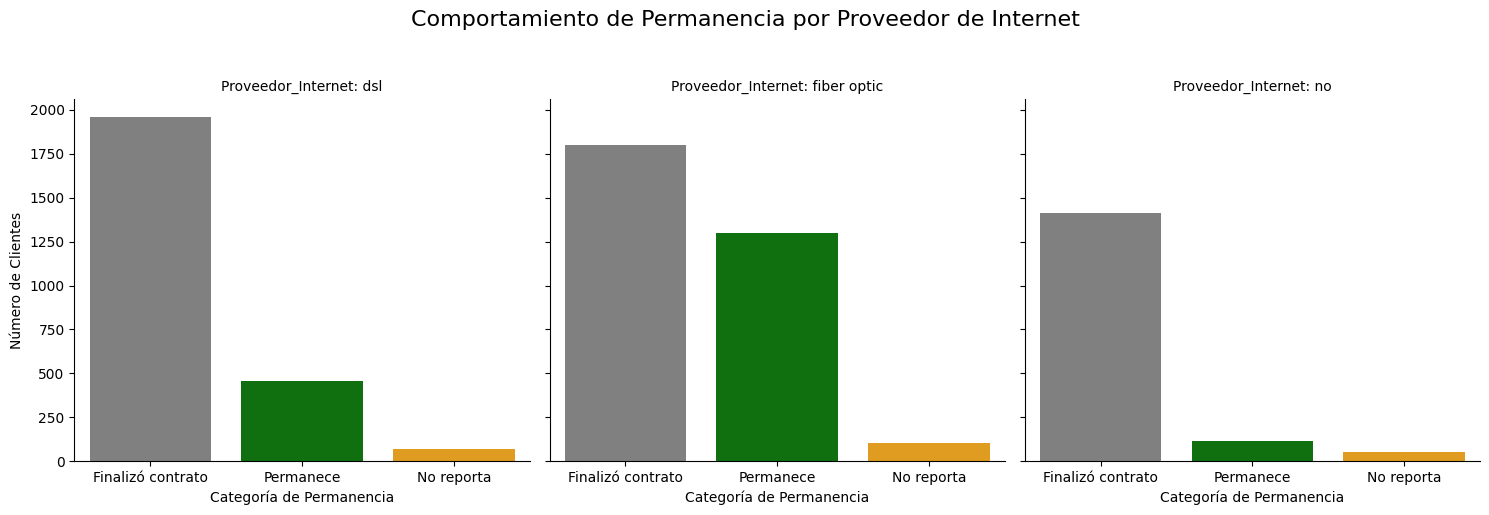

In [ ]:
# Ahora renombramos la columna del groupby
Evasión_x_Sus_int.columns = ['Proveedor_Internet', 'Continuación_Del_Servicio', 'Total']

# Definimos el orden para las categorías de 'Continuación_Del_Servico' en el eje X
permanencia_order = ['no', 'yes', 'no reporta']

# Definimos una paleta de colores personalizada
custom_palette = {'no': 'gray', 'yes': 'green', 'no reporta': 'orange'}

# Creamos el gráfico categórico con facetas para cada Tipo de Contrato
g = sns.catplot(
    data=Evasión_x_Sus_int, # Corregido: Usar el DataFrame correcto Evasión_x_Sus_int
    x='Continuación_Del_Servicio',
    y='Total',
    col='Proveedor_Internet', # Esto crea subgráficos separados para cada proveedor de internet
    kind='bar',
    height=5, # Altura de cada barra
    aspect=1, # Relación de aspecto de cada barra
    order=permanencia_order, # Establece el orden de las categorías en el eje X
    hue='Continuación_Del_Servicio', # Corregido: Asignar hue para aplicar la paleta personalizada
    hue_order=permanencia_order, # Añadido: Para asegurar el orden de los colores y la leyenda
    palette=custom_palette # Corregido: Aplicar la paleta de colores personalizada
)

# Configuramos los títulos y etiquetas
g.set_axis_labels("Categoría de Permanencia", "Número de Clientes", color='black')
g.set_titles("Proveedor_Internet: {col_name}", color='black')
# Mapeamos 'no', 'yes', 'no reporta' a etiquetas más descriptivas para el eje X
g.set_xticklabels(['Finalizó contrato', 'Permanece', 'No reporta'])
plt.suptitle('Comportamiento de Permanencia por Proveedor de Internet', y=1.02, fontsize=16, color='black') # Título general
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta el diseño para evitar la superposición del título general
plt.show()

/tmp/ipython-input-517897206.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




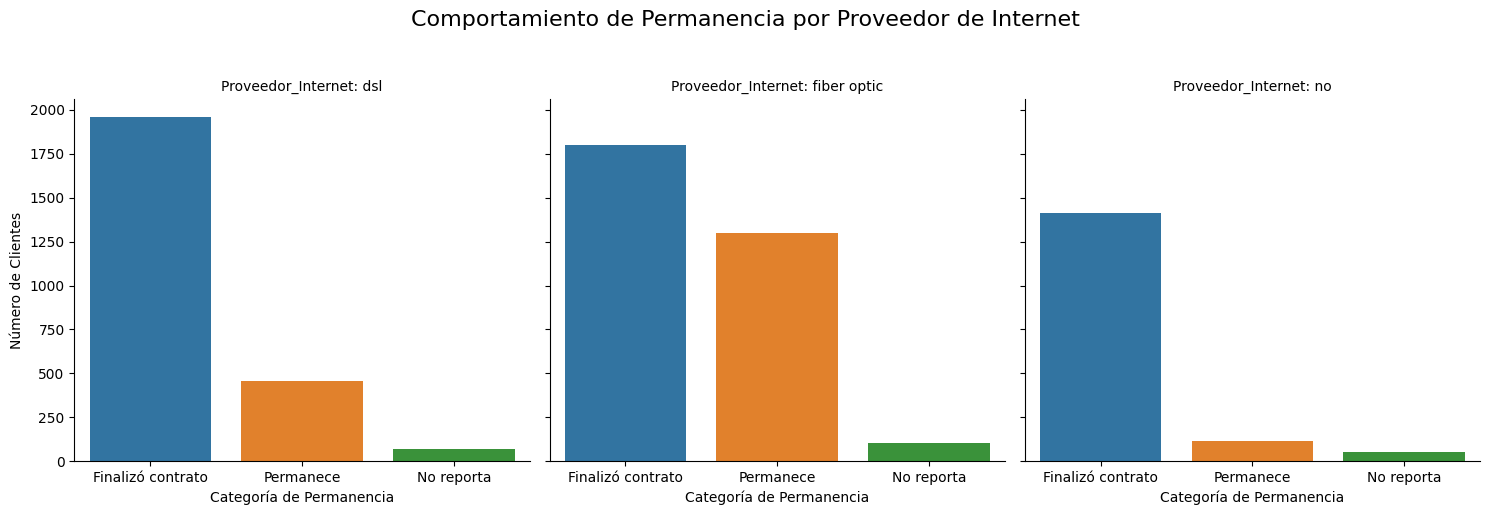

In [ ]:
# Ahora renombramos la columna del groupby
Evasión_x_Sus_int.columns = ['Proveedor_Internet', 'Continuación_Del_Servicio', 'Total']

# Definimos el orden para las categorías de 'Continuación_Del_Servico' en el eje X
permanencia_order = ['no', 'yes', 'no reporta']

# Definimos una paleta de colores personalizada
custom_palette = {'no': 'gray', 'yes': 'green', 'no reporta': 'orange'}

# Creamos el gráfico categórico con facetas para cada Tipo de Contrato
g = sns.catplot(
    data=Evasión_x_Sus_int,
    x='Continuación_Del_Servicio',
    y='Total',
    col='Proveedor_Internet', # Esto crea subgráficos separados para cada proveedor
    kind='bar',
    height=5, # Altura de cada barra
    aspect=1, # Relación de aspecto de cada barra
    order=permanencia_order, # Establece el orden de las categorías en el eje X
    hue='Continuación_Del_Servicio', # Add hue to apply palette correctly
    palette=custom_palette # Apply custom palette
)

# Configuramos los títulos y etiquetas
g.set_axis_labels("Categoría de Permanencia", "Número de Clientes")
g.set_titles("Proveedor_Internet: {col_name}")
# Mapeamos 'no', 'yes', 'no reporta' a etiquetas más descriptivas para el eje X
g.set_xticklabels(['Finalizó contrato', 'Permanece', 'No reporta'])
plt.suptitle('Comportamiento de Permanencia por Proveedor de Internet', y=1.02, fontsize=16) # Título general
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta el diseño para evitar la superposición del título general
plt.show()

### **Distribución Por Servicios Extras**

In [ ]:
Data_2.head(3)

,ID_cliente,Permanencia,Genero_cliente,Cliente_Tercera_Edad,Pareja_Cliente,Dependientes_del_Cliente,Meses_del_Contrato,Servicio_telefonico,Multiples_lineas_telefonicas,Sus_Internet,Sus_Seguridad_online,Sus_Respaldo_online,Sus_Protección_al_Dispositivo,Sus_Soporte_Técnico,Sus_Tv_por_cable,sus_streaming_movies,Tipo_Contrato,Preferencia_Factura,Metodo_de_Pago,Gasto_Mensual,Gasto_Total,Cuentas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,0,0,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.46


In [ ]:
df_sus = Data_2.copy()
df_sus.set_index('Permanencia', inplace=True)
df_sus.head(3)

,ID_cliente,Genero_cliente,Cliente_Tercera_Edad,Pareja_Cliente,Dependientes_del_Cliente,Meses_del_Contrato,Servicio_telefonico,Multiples_lineas_telefonicas,Sus_Internet,Sus_Seguridad_online,Sus_Respaldo_online,Sus_Protección_al_Dispositivo,Sus_Soporte_Técnico,Sus_Tv_por_cable,sus_streaming_movies,Tipo_Contrato,Preferencia_Factura,Metodo_de_Pago,Gasto_Mensual,Gasto_Total,Cuentas_Diarias
Permanencia,,,,,,,,,,,,,,,,,,,,,
0,0002-ORFBO,female,0,1,1,9,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,65.6,593.30,2.19
0,0003-MKNFE,male,0,0,0,9,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.00
1,0004-TLHLJ,male,0,0,0,4,1,0,fiber optic,0,0,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.46


In [ ]:
# Lista de columnas relacionadas con suscripciones de servicios
suscripciones = [
    'Servicio_telefonico',
    'Multiples_lineas_telefonicas',
    'Sus_Seguridad_online',
    'Sus_Respaldo_online',
    'Sus_Protección_al_Dispositivo',
    'Sus_Soporte_Técnico',
    'Sus_Tv_por_cable',
    'sus_streaming_movies'
]

suscripciones


['Servicio_telefonico',
 'Multiples_lineas_telefonicas',
 'Sus_Seguridad_online',
 'Sus_Respaldo_online',
 'Sus_Protección_al_Dispositivo',
 'Sus_Soporte_Técnico',
 'Sus_Tv_por_cable',
 'sus_streaming_movies']

In [ ]:
no_continuacion_x_suscripciones = df_sus.loc[0, suscripciones]
no_continuacion_x_suscripciones.head()

,Servicio_telefonico,Multiples_lineas_telefonicas,Sus_Seguridad_online,Sus_Respaldo_online,Sus_Protección_al_Dispositivo,Sus_Soporte_Técnico,Sus_Tv_por_cable,sus_streaming_movies
Permanencia,,,,,,,,
0,1,0,0,1,0,1,1,0
0,1,1,0,0,0,0,0,1
0,1,0,0,0,0,1,1,1
0,1,0,1,1,1,1,1,1
0,1,1,1,0,0,1,0,0


In [ ]:
import plotly.express as px
import pandas as pd

# Calcular los conteos para cada servicio de suscripción y sus valores 0/1
plot_data = []
for col in suscripciones:
    counts = no_continuacion_x_suscripciones[col].value_counts().reset_index()
    counts.columns = ['Valor_Suscripcion', 'Conteo']
    counts['Servicio'] = col
    plot_data.append(counts)

final_plot_df = pd.concat(plot_data)

# Asegurarse de que 'Valor_Suscripcion' sea de tipo string para que Plotly lo trate como categorías discretas
final_plot_df['Valor_Suscripcion'] = final_plot_df['Valor_Suscripcion'].astype(str)

fig = px.bar(final_plot_df,
             x='Valor_Suscripcion',
             y='Conteo',
             color='Valor_Suscripcion', # Color por 0 o 1
             color_discrete_map={'1': 'green', '0': 'red'},
             facet_col='Servicio',
             facet_col_wrap=4, # Ajustar según el número de servicios para una mejor visualización
             title='Comportamiento de Servicios Extra para Clientes que NO Continúan',
             labels={'Valor_Suscripcion': '1 = Sí 0 = No', 'Conteo': 'Número de Clientes'},
             category_orders={
                 "Valor_Suscripcion": ["0", "1"],
                 "Servicio": suscripciones # Mantener el orden de los servicios si es relevante
             },
             height=600 # Ajustar altura total del gráfico
            )

# Limpiar los títulos de las facetas (subgráficos)
fig.for_each_annotation(lambda a: a.update(text=a.text.replace('Servicio=', '')))

fig.update_layout(
    font_family='Arial',
    font_size=12,
    font_color='black',
    showlegend=True
)

fig.show()

In [ ]:
continuacion_x_suscripciones = df_sus.loc[1, suscripciones]
continuacion_x_suscripciones.head()

,Servicio_telefonico,Multiples_lineas_telefonicas,Sus_Seguridad_online,Sus_Respaldo_online,Sus_Protección_al_Dispositivo,Sus_Soporte_Técnico,Sus_Tv_por_cable,sus_streaming_movies
Permanencia,,,,,,,,
1,1,0,0,0,1,0,0,0
1,1,0,0,1,1,0,1,1
1,1,0,0,0,0,1,1,0
1,1,0,1,0,1,0,0,1
1,0,0,0,0,0,0,0,0


In [ ]:
# Calcular los conteos para cada servicio de suscripción y sus valores 0/1
plot_data_cxs = []
for col in suscripciones:
    counts = continuacion_x_suscripciones[col].value_counts().reset_index()
    counts.columns = ['Valor_Suscripcion', 'Conteo']
    counts['Servicio'] = col
    plot_data_cxs.append(counts)

final_plot_cxs = pd.concat(plot_data_cxs)

# Asegurarse de que 'Valor_Suscripcion' sea de tipo string para que Plotly lo trate como categorías discretas
final_plot_cxs['Valor_Suscripcion'] = final_plot_cxs['Valor_Suscripcion'].astype(str)

fig = px.bar(final_plot_cxs,
             x='Valor_Suscripcion',
             y='Conteo',
             color='Valor_Suscripcion', # Color por 0 o 1
             color_discrete_map={'1': 'green', '0': 'red'},
             facet_col='Servicio',
             facet_col_wrap=4, # Ajustar según el número de servicios para una mejor visualización
             title='Comportamiento de Servicios Extra para Clientes que Continúan',
             labels={'Valor_Suscripcion': '1 = Sí 0 = No', 'Conteo': 'Número de Clientes'},
             category_orders=
{
                 "Valor_Suscripcion": ["0", "1"],
                 "Servicio": suscripciones # Mantener el orden de los servicios si es relevante
             },
             height=600 # Ajustar altura total del gráfico
            )

# Limpiar los títulos de las facetas (subgráficos)
fig.for_each_annotation(lambda a: a.update(text=a.text.replace('Servicio=', '')))

fig.update_layout(
    font_family='Arial',
    font_size=12,
    font_color='black',
    showlegend=True
)

fig.show()

### **Genero Por Servicios Extras**



In [ ]:
Data.head(3)

,ID_cliente,Permanencia,Genero_cliente,Cliente_Tercera_Edad,Pareja_Cliente,Dependientes_del_Cliente,Meses_del_Contrato,Servicio_telefonico,Multiples_lineas_telefonicas,Sus_Internet,Sus_Seguridad_online,Sus_Respaldo_online,Sus_Protección_al_Dispositivo,Sus_Soporte_Técnico,Sus_Tv_por_cable,sus_streaming_movies,Tipo_Contrato,Preferencia_Factura,Metodo_de_Pago,Gasto_Mensual,Gasto_Total,Cuentas_Diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.19
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.46


In [ ]:
Hombres = Data[Data['Genero_cliente'] == 'male'][suscripciones]
Hombres.head()

,Servicio_telefonico,Multiples_lineas_telefonicas,Sus_Seguridad_online,Sus_Respaldo_online,Sus_Protección_al_Dispositivo,Sus_Soporte_Técnico,Sus_Tv_por_cable,sus_streaming_movies
1,yes,yes,no,no,no,no,no,yes
2,yes,no,no,no,yes,no,no,no
3,yes,no,no,yes,yes,no,yes,yes
7,yes,yes,yes,no,no,yes,no,no
10,no,no,yes,no,no,yes,yes,no


In [ ]:
# Calcular los conteos para cada servicio de suscripción y sus valores
plot_data_h = []
for col in suscripciones:
    counts = Hombres[col].value_counts().reset_index()
    counts.columns = ['Valor_Suscripcion', 'Conteo']
    counts['Servicio'] = col
    plot_data_h.append(counts)

final_plot_H = pd.concat(plot_data_h)

# Asegurarse de que 'Valor_Suscripcion' sea de tipo string para que Plotly lo trate como categorías discretas
final_plot_H['Valor_Suscripcion'] = final_plot_H['Valor_Suscripcion'].astype(str)

fig = px.bar(final_plot_H,
             x='Valor_Suscripcion',
             y='Conteo',
             color='Valor_Suscripcion', # Color por no o yes
             color_discrete_map={'yes': 'blue', 'no': 'grey'},
             facet_col='Servicio',
             facet_col_wrap=4, # Ajustar según el número de servicios para una mejor visualización
             title='Comportamiento de Servicios Extra para Clientes que son Hombres',
             labels={'Valor_Suscripcion': '', 'Conteo': 'Número de Clientes'},
             category_orders={
                 "Valor_Suscripcion": ["no", "yes"],
                 "Servicio": suscripciones # Mantener el orden de los servicios si es relevante
             },
             height=600 # Ajustar altura total del gráfico
            )

# Limpiar los títulos de las facetas (subgráficos)
fig.for_each_annotation(lambda a: a.update(text=a.text.replace('Servicio=', '')))

fig.update_layout(
    font_family='Arial',
    font_size=12,
    font_color='black',
    showlegend=True
)

fig.show()

In [ ]:
Mujeres = Data[Data['Genero_cliente'] == 'female'][suscripciones]
Mujeres.head()

,Servicio_telefonico,Multiples_lineas_telefonicas,Sus_Seguridad_online,Sus_Respaldo_online,Sus_Protección_al_Dispositivo,Sus_Soporte_Técnico,Sus_Tv_por_cable,sus_streaming_movies
0,yes,no,no,yes,no,yes,yes,no
4,yes,no,no,no,no,yes,yes,no
5,yes,no,no,no,no,yes,yes,yes
6,yes,no,yes,yes,yes,yes,yes,yes
8,yes,no,yes,no,no,no,no,no


In [ ]:
# Calcular los conteos para cada servicio de suscripción y sus valores
plot_data_m = []
for col in suscripciones:
    counts = Mujeres[col].value_counts().reset_index()
    counts.columns = ['Valor_Suscripcion', 'Conteo']
    counts['Servicio'] = col
    plot_data_m.append(counts)

final_plot_M = pd.concat(plot_data_m)

# Asegurarse de que 'Valor_Suscripcion' sea de tipo string para que Plotly lo trate como categorías discretas
final_plot_M['Valor_Suscripcion'] = final_plot_M['Valor_Suscripcion'].astype(str)

fig = px.bar(final_plot_M,
             x='Valor_Suscripcion',
             y='Conteo',
             color='Valor_Suscripcion', # Color por SI o NO
             color_discrete_map={'yes': 'pink', 'no': 'grey'},
             facet_col='Servicio',
             facet_col_wrap=4, # Ajustar según el número de servicios para una mejor visualización
             title='Comportamiento de Servicios Extra para Clientes que son Mujeres',
             labels={'Valor_Suscripcion': '', 'Conteo': 'Número de Clientes'},
             category_orders={
                 "Valor_Suscripcion": ["no", "yes"],
                 "Servicio": suscripciones # Mantener el orden de los servicios si es relevante
             },
             height=600 # Ajustar altura total del gráfico
            )

# Limpiar los títulos de las facetas (subgráficos)
fig.for_each_annotation(lambda a: a.update(text=a.text.replace('Servicio=', '')))

fig.update_layout(
    font_family='Arial',
    font_size=12,
    font_color='black',
    showlegend=True
)

fig.show()

## **Variables Númericas**

In [ ]:
Data_2.head(3)

,ID_cliente,Permanencia,Genero_cliente,Cliente_Tercera_Edad,Pareja_Cliente,Dependientes_del_Cliente,Meses_del_Contrato,Servicio_telefonico,Multiples_lineas_telefonicas,Sus_Internet,Sus_Seguridad_online,Sus_Respaldo_online,Sus_Protección_al_Dispositivo,Sus_Soporte_Técnico,Sus_Tv_por_cable,sus_streaming_movies,Tipo_Contrato,Preferencia_Factura,Metodo_de_Pago,Gasto_Mensual,Gasto_Total,Cuentas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,0,0,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.46


### **Distrobución por Tiempo de contrato**

In [ ]:
Data_2['Meses_del_Contrato'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [ ]:
Cancelación_x_TC = Data_2.groupby(['Meses_del_Contrato','Permanencia'])['Permanencia'].count().reset_index(name='Conteo')
Cancelación_x_TC.head()

,Meses_del_Contrato,Permanencia,Conteo
0,0,0,11
1,1,0,233
2,1,1,380
3,1,no reporta,21
4,2,0,115


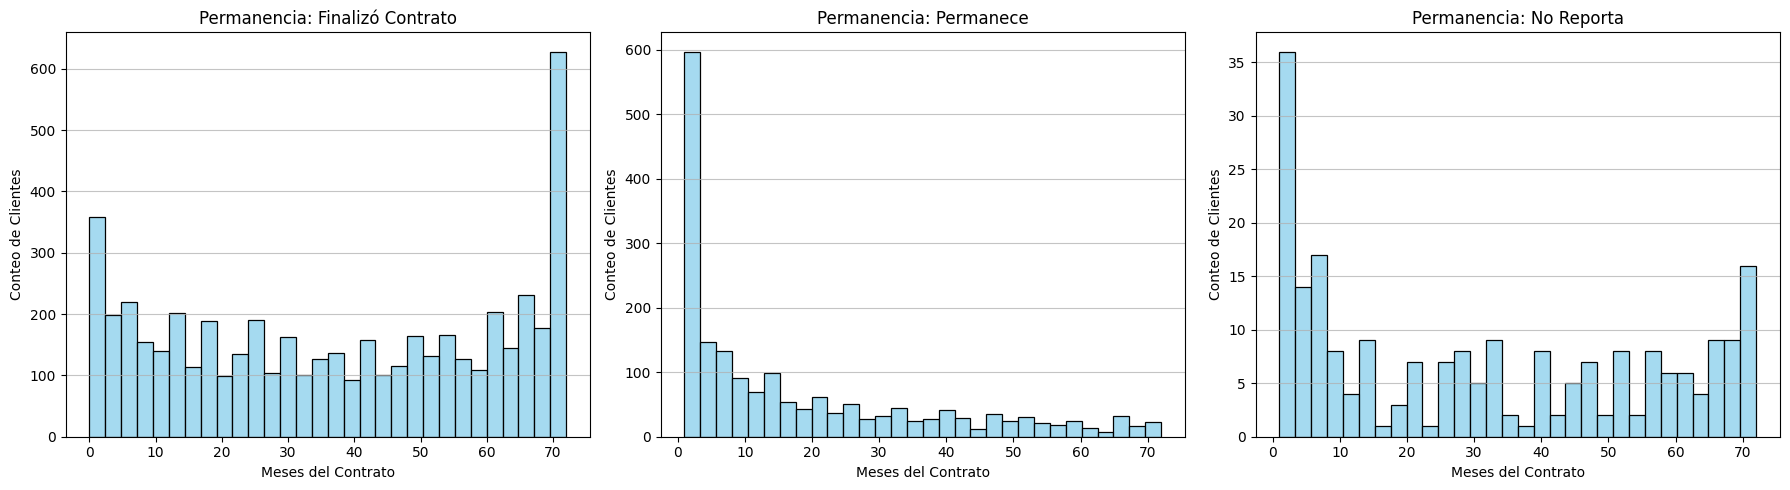

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los valores únicos de la columna 'Permanencia'
permanencia_categorias = Data_2['Permanencia'].unique()

# Diccionario para mapear los valores numéricos a etiquetas más descriptivas para los títulos
permanencia_labels = {
    0: 'Finalizó Contrato',
    1: 'Permanece',
    'no reporta': 'No Reporta'
}

# Definir una paleta de colores personalizada para los histogramas
custom_hist_colors = {
    0: 'gray',
    1: 'green',
    'no reporta': 'orange'
}

# Crear una figura con subplots para los tres histogramas
plt.figure(figsize=(18, 5))

for i, categoria in enumerate(permanencia_categorias):
    plt.subplot(1, len(permanencia_categorias), i + 1)

    # Filtrar el DataFrame para la categoría actual
    df_categoria = Data_2[Data_2['Permanencia'] == categoria]

    # Obtener el color correspondiente para la categoría
    bar_color = custom_hist_colors.get(categoria, 'skyblue') # Fallback to skyblue if not found

    # Crear el histograma
    sns.histplot(df_categoria['Meses_del_Contrato'], bins=30, kde=False, color=bar_color)

    # Configurar título y etiquetas
    plt.title(f'Permanencia: {permanencia_labels.get(categoria, categoria)}')
    plt.xlabel('Meses del Contrato')
    plt.ylabel('Conteo de Clientes')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### **Distribución Por Gastos**

In [ ]:
df_gs = Data_2.copy()
df_gs.set_index('Permanencia', inplace=True)
df_gs.head(3)

,ID_cliente,Genero_cliente,Cliente_Tercera_Edad,Pareja_Cliente,Dependientes_del_Cliente,Meses_del_Contrato,Servicio_telefonico,Multiples_lineas_telefonicas,Sus_Internet,Sus_Seguridad_online,Sus_Respaldo_online,Sus_Protección_al_Dispositivo,Sus_Soporte_Técnico,Sus_Tv_por_cable,sus_streaming_movies,Tipo_Contrato,Preferencia_Factura,Metodo_de_Pago,Gasto_Mensual,Gasto_Total,Cuentas_Diarias
Permanencia,,,,,,,,,,,,,,,,,,,,,
0,0002-ORFBO,female,0,1,1,9,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,65.6,593.30,2.19
0,0003-MKNFE,male,0,0,0,9,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.00
1,0004-TLHLJ,male,0,0,0,4,1,0,fiber optic,0,0,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.46


In [ ]:
# Lista de columnas relacionadas con Gastos
Gastos = [
    'ID_cliente',
    'Gasto_Mensual',
    'Gasto_Total',
    'Cuentas_Diarias'
]
Gastos

['ID_cliente', 'Gasto_Mensual', 'Gasto_Total', 'Cuentas_Diarias']

#### **No continuación de Contrato**

In [ ]:
no_continuacion_x_gastos = df_gs.loc[0, Gastos]
no_continuacion_x_gastos.head()

,ID_cliente,Gasto_Mensual,Gasto_Total,Cuentas_Diarias
Permanencia,,,,
0,0002-ORFBO,65.60,593.30,2.19
0,0003-MKNFE,59.90,542.40,2.00
0,0013-MHZWF,69.40,571.45,2.31
0,0013-SMEOE,109.70,7904.25,3.66
0,0014-BMAQU,84.65,5377.80,2.82


##### **Mensual**

In [ ]:
import numpy as np
import plotly.graph_objects as go

# 1. Calcular el histograma manualmente para obtener los conteos de los bins
counts, bins = np.histogram(no_continuacion_x_gastos['Gasto_Mensual'], bins=50) # Usamos los mismos 50 bins

# 2. Crear un DataFrame temporal con los datos del histograma
hist_data_NC = pd.DataFrame({
    'bin_start': bins[:-1],
    'bin_end': bins[1:],
    'count': counts,
    'bin_center': (bins[:-1] + bins[1:]) / 2
})

# 3. Identificar los 10 bins con mayor frecuencia
top_10_bins = hist_data_NC.nlargest(10, 'count')

# 4. Asignar colores: verde para los 10 principales, azul (o cualquier otro color) para el resto
hist_data_NC['color'] = 'lightgray' # Color predeterminado para las barras no destacadas

# Asignar verde a las barras que están en el top 10
for index, row in top_10_bins.iterrows():
    # Encontrar la barra correspondiente en hist_data y asignarle el color verde
    # Esto se hace comparando los centros de los bins o los rangos
    matching_bins = hist_data_NC[(hist_data_NC['bin_start'] == row['bin_start']) & (hist_data_NC['bin_end'] == row['bin_end'])]
    if not matching_bins.empty:
        hist_data_NC.loc[matching_bins.index, 'color'] = 'green'

# 5. Crear el gráfico de barras usando plotly.graph_objects
fig = go.Figure(data=[go.Bar(
    x=hist_data_NC['bin_center'],
    y=hist_data_NC['count'],
    marker_color=hist_data_NC['color'],
    width=hist_data_NC['bin_end'] - hist_data_NC['bin_start'] # Para que las barras tengan el ancho correcto de los bins
)])

# Configurar el diseño del gráfico
fig.update_layout(
    title='Distribución de Gastos Mensuales para Clientes que No Permanecen',
    xaxis_title='Gasto Mensual',
    yaxis_title='Número de Clientes',
    font_family='Arial',
    font_size=14,
    font_color='black',
    width=800,
    height=500
)

fig.show()

In [ ]:
# Crear un DataFrame temporal para fines de trazado.
# Restablecer el índice para crear un nuevo índice numérico para el eje X.
temp_df_NC = no_continuacion_x_gastos.reset_index(drop=True)

# Obtener los 10 valores más altos de 'Gasto_Mensual'
top_10_gastos_mensual = temp_df_NC.nlargest(10, 'Gasto_Mensual')

# Trazar Gasto_Mensual como una línea, mostrando solo los 10 valores más altos
fig = px.line(top_10_gastos_mensual, x='ID_cliente', y='Gasto_Mensual',
              title='Top 10 Gastos Mensuales de Clientes que No Permanecen',
              markers=True) # Los marcadores se establecen en True para resaltar los puntos

fig.update_layout(width= 800, height= 400, xaxis={'tickangle': 90},
                  xaxis_title='ID del Cliente',
                  yaxis_title='Monto de Gasto Mensual',
                  font_family='Arial', font_size=14, font_color='Black')
fig.show()

##### **Total**

In [ ]:
counts, bins = np.histogram(no_continuacion_x_gastos['Gasto_Total'].dropna(), bins=50) # Usamos los mismos 50 bins

# 2. Crear un DataFrame temporal con los datos del histograma
hist_data_NC = pd.DataFrame({
    'bin_start': bins[:-1],
    'bin_end': bins[1:],
    'count': counts,
    'bin_center': (bins[:-1] + bins[1:]) / 2
})

# 3. Identificar los 10 bins con mayor frecuencia
top_10_bins = hist_data_NC.nlargest(10, 'count')

# 4. Asignar colores: verde para los 10 principales, azul (o cualquier otro color) para el resto
hist_data_NC['color'] = 'lightgray' # Color predeterminado para las barras no destacadas

# Asignar verde a las barras que están en el top 10
for index, row in top_10_bins.iterrows():
    # Encontrar la barra correspondiente en hist_data y asignarle el color verde
    # Esto se hace comparando los centros de los bins o los rangos
    matching_bins = hist_data_NC[(hist_data_NC['bin_start'] == row['bin_start']) & (hist_data_NC['bin_end'] == row['bin_end'])]
    if not matching_bins.empty:
        hist_data_NC.loc[matching_bins.index, 'color'] = 'green'

# 5. Crear el gráfico de barras usando plotly.graph_objects
fig = go.Figure(data=[go.Bar(
    x=hist_data_NC['bin_center'],
    y=hist_data_NC['count'],
    marker_color=hist_data_NC['color'],
    width=hist_data_NC['bin_end'] - hist_data_NC['bin_start'] # Para que las barras tengan el ancho correcto de los bins
)])

# Configurar el diseño del gráfico
fig.update_layout(
    title='Distribución de Gastos Totales para Clientes que No Permanecen',
    xaxis_title='Gasto Total',
    yaxis_title='Número de Clientes',
    font_family='Arial',
    font_size=14,
    font_color='black',
    width=800,
    height=500
)

fig.show()

In [ ]:
# Obtener los 10 valores más altos de 'Gasto_Totall'
top_10_gastos_total = temp_df_NC.nlargest(10, 'Gasto_Total')

# Trazar Gasto_Total como una línea, mostrando solo los 10 valores más altos
fig = px.line(top_10_gastos_total, x='ID_cliente', y='Gasto_Total',
              title='Top 10 Gastos Total de Clientes que No Permanecen',
              markers=True) # Los marcadores se establecen en True para resaltar los puntos

fig.update_layout(width= 800, height= 400, xaxis={'tickangle': 90},
                  xaxis_title='ID del Cliente',
                  yaxis_title='Monto de Gasto Total',
                  font_family='Arial', font_size=14, font_color='Black')
fig.show()

#### **Continuación de Contrato**

In [ ]:
continuacion_x_gastos = df_gs.loc[1, Gastos]
continuacion_x_gastos.head()

,ID_cliente,Gasto_Mensual,Gasto_Total,Cuentas_Diarias
Permanencia,,,,
1,0004-TLHLJ,73.9,280.85,2.46
1,0011-IGKFF,98.0,1237.85,3.27
1,0013-EXCHZ,83.9,267.40,2.80
1,0022-TCJCI,62.7,2791.50,2.09
1,0023-HGHWL,25.1,25.10,0.84


##### **Mensual**

In [ ]:
import numpy as np
import plotly.graph_objects as go

# 1. Calcular el histograma manualmente para obtener los conteos de los bins
counts, bins = np.histogram(continuacion_x_gastos['Gasto_Mensual'], bins=50) # Usamos los mismos 50 bins

# 2. Crear un DataFrame temporal con los datos del histograma
hist_data = pd.DataFrame({
    'bin_start': bins[:-1],
    'bin_end': bins[1:],
    'count': counts,
    'bin_center': (bins[:-1] + bins[1:]) / 2
})

# 3. Identificar los 10 bins con mayor frecuencia
top_10_bins = hist_data.nlargest(10, 'count')

# 4. Asignar colores: verde para los 10 principales, azul (o cualquier otro color) para el resto
hist_data['color'] = 'lightgray' # Color predeterminado para las barras no destacadas

# Asignar verde a las barras que están en el top 10
for index, row in top_10_bins.iterrows():
    # Encontrar la barra correspondiente en hist_data y asignarle el color verde
    # Esto se hace comparando los centros de los bins o los rangos
    matching_bins = hist_data[(hist_data['bin_start'] == row['bin_start']) & (hist_data['bin_end'] == row['bin_end'])]
    if not matching_bins.empty:
        hist_data.loc[matching_bins.index, 'color'] = 'green'

# 5. Crear el gráfico de barras usando plotly.graph_objects
fig = go.Figure(data=[go.Bar(
    x=hist_data['bin_center'],
    y=hist_data['count'],
    marker_color=hist_data['color'],
    width=hist_data['bin_end'] - hist_data['bin_start'] # Para que las barras tengan el ancho correcto de los bins
)])

# Configurar el diseño del gráfico
fig.update_layout(
    title='Distribución de Gastos Mensuales para Clientes que Permanecen',
    xaxis_title='Gasto Mensual',
    yaxis_title='Número de Clientes',
    font_family='Arial',
    font_size=14,
    font_color='black',
    width=800,
    height=500
)

fig.show()

In [ ]:
# Crear un DataFrame temporal para fines de trazado.
# Restablecer el índice para crear un nuevo índice numérico para el eje X.
temp_df = continuacion_x_gastos.reset_index(drop=True)

# Obtener los 10 valores más altos de 'Gasto_Mensual'
top_10_gastos_mensual = temp_df.nlargest(10, 'Gasto_Mensual')

# Trazar Gasto_Mensual como una línea, mostrando solo los 10 valores más altos
fig = px.line(top_10_gastos_mensual, x='ID_cliente', y='Gasto_Mensual',
              title='Top 10 Gastos Mensuales de Clientes que Permanecen',
              markers=True) # Los marcadores se establecen en True para resaltar los puntos

fig.update_layout(width= 800, height= 400, xaxis={'tickangle': 90},
                  xaxis_title='ID del Cliente',
                  yaxis_title='Monto de Gasto Mensual',
                  font_family='Arial', font_size=14, font_color='Black')
fig.show()

##### **Total**

In [ ]:
counts, bins = np.histogram(continuacion_x_gastos['Gasto_Total'], bins=50) # Usamos los mismos 50 bins

# 2. Crear un DataFrame temporal con los datos del histograma
hist_data = pd.DataFrame({
    'bin_start': bins[:-1],
    'bin_end': bins[1:],
    'count': counts,
    'bin_center': (bins[:-1] + bins[1:]) / 2
})

# 3. Identificar los 10 bins con mayor frecuencia
top_10_bins = hist_data.nlargest(10, 'count')

# 4. Asignar colores: verde para los 10 principales,(o cualquier otro color) para el resto
hist_data['color'] = 'lightgray' # Color predeterminado para las barras no destacadas

# Asignar verde a las barras que están en el top 10
for index, row in top_10_bins.iterrows():
    # Encontrar la barra correspondiente en hist_data y asignarle el color verde
    # Esto se hace comparando los centros de los bins o los rangos
    matching_bins = hist_data[(hist_data['bin_start'] == row['bin_start']) & (hist_data['bin_end'] == row['bin_end'])]
    if not matching_bins.empty:
        hist_data.loc[matching_bins.index, 'color'] = 'green'

# 5. Crear el gráfico de barras usando plotly.graph_objects
fig = go.Figure(data=[go.Bar(
    x=hist_data['bin_center'],
    y=hist_data['count'],
    marker_color=hist_data['color'],
    width=hist_data['bin_end'] - hist_data['bin_start'] # Para que las barras tengan el ancho correcto de los bins
)])

# Configurar el diseño del gráfico
fig.update_layout(
    title='Distribución de Gastos Total para Clientes que Permanecen',
    xaxis_title='Gasto Total',
    yaxis_title='Número de Clientes',
    font_family='Arial',
    font_size=14,
    font_color='black',
    width=800,
    height=500
)

fig.show()

In [ ]:

# Obtener los 10 valores más altos de 'Gasto_Total'
top_10_gastos_Total = temp_df.nlargest(10, 'Gasto_Total')

# Trazar Gasto_Mensual como una línea, mostrando solo los 10 valores más altos
fig = px.line(top_10_gastos_Total, x='ID_cliente', y='Gasto_Total',
              title='Top 10 Gastos Totales de Clientes que Permanecen',
              markers=True) # Los marcadores se establecen en True para resaltar los puntos

fig.update_layout(width= 800, height= 400, xaxis={'tickangle': 90},
                  xaxis_title='ID del Cliente',
                  yaxis_title='Monto de Gasto Total',
                  font_family='Arial', font_size=14, font_color='Black')
fig.show()

## 📄**Informe final**

### **1. Distribución de Permanencia de Clientes**

**Observaciones:**

*   **Finalizaron contrato (`no`)**: Un gran número de clientes, **5174**, han finalizado su contrato. Esto representa la mayoría de los clientes en el dataset y es una cifra significativa para el problema del churn.
*   **Permanecen (`yes`)**: Un grupo menor, **1869** clientes, han permanecido con el servicio. Esta es la base de clientes fieles que se busca retener.
*   **No reporta (`no reporta`)**: Hay **224** clientes cuya permanencia no ha sido reportada. Es crucial investigar la razón de estos valores faltantes, ya que podrían ocultar patrones importantes de churn o permanencia que afectan el análisis general.

**Conclusión Clave:**
La empresa enfrenta un problema considerable de retención de clientes, con una proporción sustancialmente mayor de clientes que finalizan su contrato en comparación con los que permanecen. La categoría 'no reporta' requiere una investigación para una imagen completa.

### **2. Comportamiento de Permanencia por Género**

**Observaciones:**

*   **Distribución general:** Tanto hombres como mujeres muestran patrones de permanencia similares, con un mayor número de clientes que finalizan el contrato (`no`) en comparación con los que permanecen (`yes`).
    *   **Mujeres:** 2549 clientes finalizaron, 939 permanecen, y 104 no reportan.
    *   **Hombres:** 2625 clientes finalizaron, 930 permanecen, y 120 no reportan.
*   **Proporción de Permanencia:** Las proporciones de clientes que finalizan contrato y permanecen son bastante equilibradas entre géneros. No se observa una disparidad significativa en la tasa de churn entre hombres y mujeres. Esto sugiere que el género por sí solo no es un factor determinante en la decisión de un cliente de finalizar o continuar su contrato.

**Conclusión Clave:**
El género no parece ser un factor diferenciador significativo en la probabilidad de que un cliente finalice su contrato o permanezca. Las estrategias para reducir el churn no deberían enfocarse en diferencias de género.

### **3. Comportamiento de Permanencia por Tipo de Contrato**

**Observaciones:**

*   **Contratos mes a mes (`month-to-month`):** Este tipo de contrato muestra la tasa de finalización más alta. De los clientes con este contrato, 2220 finalizaron, 1655 permanecen, y 130 no reportan. La proporción de clientes que finalizan contrato es significativamente mayor que la de los que permanecen.
*   **Contratos a un año (`one year`):** Los contratos a un año tienen una tasa de finalización mucho menor en comparación con los contratos mensuales. 1307 clientes finalizaron, 166 permanecen, y 46 no reportan. Sin embargo, la cantidad de clientes que permanecen es bastante baja en comparación con los que finalizan.
*   **Contratos a dos años (`two year`):** Este tipo de contrato exhibe la tasa de finalización más baja y una alta retención. Solo 48 clientes finalizaron, mientras que 1647 permanecen, y 48 no reportan. Esto indica una fuerte lealtad de los clientes con contratos a largo plazo.

**Conclusión Clave:**
Existe una clara correlación entre la duración del contrato y la permanencia del cliente. Los contratos de **mes a mes** son los que presentan mayor riesgo de churn, mientras que los contratos a **dos años** demuestran la mayor estabilidad. La empresa debería enfocar sus estrategias de retención en incentivar a los clientes de contratos mensuales a optar por contratos de mayor duración, o mejorar la oferta para clientes de un año.

### **4. Comportamiento de Permanencia por Método de Pago**

**Observaciones:**

*   **Cheque electrónico (`electronic check`):** Este método de pago está fuertemente asociado con la finalización del contrato. 1071 clientes que usan este método permanecen, mientras que 1294 finalizan contrato y 80 no reportan. Esto sugiere que los clientes que utilizan cheques electrónicos tienen una propensión mucho mayor a finalizar el servicio.
*   **Cheque por correo (`mailed check`):** Muestra una tendencia similar al cheque electrónico en términos de finalización, pero con un menor número de clientes que permanecen. 308 clientes que usan este método permanecen, 1304 finalizaron y 53 no reportan.
*   **Transferencia bancaria (automática) (`bank transfer (automatic)`) y Tarjeta de crédito (automática) (`credit card (automatic)`):** Estos métodos automáticos muestran una tasa de finalización considerablemente más baja y una mayor proporción de clientes que permanecen. Los clientes que utilizan estos métodos de pago automáticos tienden a ser más estables y leales.
    *   **Transferencia bancaria:** 258 permanecen, 1286 finalizan, 45 no reportan.
    *   **Tarjeta de crédito:** 232 permanecen, 1290 finalizan, 46 no reportan.

**Conclusión Clave:**
El **cheque electrónico** es el método de pago con la mayor tasa de churn, lo que indica que los clientes que lo utilizan son menos estables. La empresa debería investigar por qué este método de pago se asocia con una mayor finalización de contratos y considerar incentivar el uso de métodos de pago automáticos (transferencia bancaria o tarjeta de crédito), que demuestran una mayor permanencia del cliente.

### **5. Comportamiento de Permanencia por Proveedor de Internet**

**Observaciones:**

*   **Sin servicio de internet (`no`):** Los clientes sin servicio de internet muestran una baja tasa de finalización de contrato en comparación con los otros grupos. 1413 clientes finalizaron, 113 permanecen, y 55 no reportan. Aunque el número de clientes que permanecen es bajo, la proporción de churn es menor que en otros segmentos.
*   **DSL (`dsl`):** Los clientes con servicio DSL tienen una tasa de finalización intermedia. 1962 clientes finalizaron, 459 permanecen, y 67 no reportan. La proporción de clientes que finalizan es considerablemente mayor que la de los que permanecen.
*   **Fibra óptica (`fiber optic`):** Este servicio presenta la mayor tasa de finalización de contrato. 1799 clientes finalizaron, 1297 permanecen, y 102 no reportan. Aunque también tiene un número elevado de clientes que permanecen, la alta cantidad de clientes que finalizan contrato sugiere que el servicio de fibra óptica, a pesar de ser de alta velocidad, podría estar asociado con una mayor insatisfacción o ser más propenso al churn.

**Conclusión Clave:**
Los clientes con **fibra óptica** son los más propensos a finalizar el contrato, lo cual es contra-intuitivo dado que generalmente se asocia con un servicio superior. Esto sugiere posibles problemas con el precio, la calidad del servicio real, o la atención al cliente para este segmento. Los clientes sin servicio de internet son los más estables en términos de finalización. La empresa debería investigar las razones detrás de la alta tasa de churn en el servicio de fibra óptica para desarrollar estrategias de retención específicas.

### **6. Comportamiento de Servicios Extra**

**Observaciones Generales (Clientes que NO Continúan vs. Clientes que Continúan):**

*   **Servicio Telefónico y Múltiples Líneas Telefónicas:**
    *   **Clientes que NO Continúan (Churn):** Una gran mayoría de clientes que no continúan sí tienen **Servicio Telefónico**. Respecto a **Múltiples Líneas Telefónicas**, hay una división, pero un número significativo no las tiene.
    *   **Clientes que Continúan:** Similarmente, una gran mayoría de clientes que permanecen tienen **Servicio Telefónico**. En cuanto a **Múltiples Líneas Telefónicas**, la distribución es más equilibrada, aunque ligeramente más clientes que continúan tienen múltiples líneas que los que no continúan.
    *   **Insight:** El servicio telefónico por sí solo no parece ser un factor diferenciador clave para el churn, ya que es casi universal. Múltiples líneas podrían tener un impacto ligeramente positivo en la retención.

*   **Servicios de Seguridad y Respaldo (Online Security, Online Backup, Device Protection, Tech Support):**
    *   **Clientes que NO Continúan (Churn):** Un porcentaje notablemente alto de clientes que no continúan **no tienen** servicios como **Online Security**, **Online Backup**, **Device Protection** y **Tech Support**. Los gráficos muestran que la cantidad de clientes sin estos servicios es significativamente mayor que los que sí los tienen en el grupo de churn.
    *   **Clientes que Continúan:** Entre los clientes que sí continúan, la proporción de quienes tienen estos servicios es mayor en comparación con el grupo de churn, y la diferencia entre tener y no tener el servicio es menos marcada. Esto sugiere que estos servicios tienen un impacto positivo en la retención.
    *   **Insight:** La ausencia de servicios de valor añadido relacionados con la seguridad, respaldo y soporte técnico está fuertemente correlacionada con el churn. Los clientes que optan por estos servicios adicionales tienden a ser más fieles. La empresa debería promocionar activamente estos servicios como un medio para aumentar la lealtad.

*   **Servicios de Streaming (Streaming TV, Streaming Movies):**
    *   **Clientes que NO Continúan (Churn):** La distribución entre tener o no tener **Streaming TV** y **Streaming Movies** es más pareja, aunque todavía se observa un número considerable de clientes que no continúan y no tienen estos servicios.
    *   **Clientes que Continúan:** Entre los que continúan, la adopción de estos servicios es más alta o al menos más equilibrada en comparación con el grupo de churn.
    *   **Insight:** Si bien no son tan críticos como los servicios de seguridad, los servicios de streaming también contribuyen a la permanencia. Los clientes que disfrutan de contenido adicional pueden sentirse más vinculados al proveedor.

**Conclusión Clave:**
Los servicios extra que más influyen en la retención son aquellos relacionados con la seguridad y el soporte (Online Security, Online Backup, Device Protection, Tech Support). Los clientes que no contratan estos servicios son significativamente más propensos a finalizar su contrato. La empresa debería enfocar sus esfuerzos de venta y retención en estos servicios, destacando su valor para el cliente.

### **7. Distribución por Tiempo de Contrato**

**Observaciones:**

*   **Finalizaron contrato (`no`):** La mayoría de los clientes que finalizan contrato lo hacen en los primeros meses de servicio, con un pico de churn en los primeros meses. Sin embargo, también hay un número considerable de clientes que finalizan contrato después de un tiempo más prolongado, aunque en menor medida.
*   **Permanecen (`yes`):** Los clientes que permanecen con el servicio tienden a tener una duración de contrato más prolongada, con una distribución que se desplaza hacia valores más altos en 'Meses_del_Contrato'. Esto es consistente con la idea de que los clientes más antiguos son más leales.
*   **No reporta (`no reporta`):** La distribución de los clientes 'no reporta' en 'Meses_del_Contrato' parece ser una mezcla, lo que subraya la necesidad de investigar estos casos para entender mejor su comportamiento.

**Conclusión Clave:**
La duración del contrato es un fuerte predictor de la permanencia. Los clientes con **pocos meses de contrato** son los más vulnerables a la finalización. La empresa debería implementar estrategias de retención intensivas para los clientes nuevos y de mediana antigüedad para fomentar la permanencia a largo plazo. Los clientes de larga duración tienden a ser más estables.

### **8. Distribución por Gastos (Mensual y Total)**

**Observaciones Generales:**

*   **Gasto Mensual:**
    *   **Clientes que NO Permanecen (Churn):** La distribución de `Gasto_Mensual` para los clientes que no permanecen muestra que una parte significativa de ellos tiene gastos mensuales más bajos, con picos en los rangos de gastos más bajos y medios. Sin embargo, también hay un grupo considerable con gastos mensuales altos que finalizan el contrato.
    *   **Clientes que Permanecen:** Para los clientes que permanecen, la distribución es más uniforme en los rangos de gastos medios a altos, indicando que los clientes con facturas mensuales más elevadas son más propensos a quedarse.
    *   **Insight:** Los clientes con `Gasto_Mensual` bajo o medio son más propensos a finalizar el contrato. Esto podría indicar que perciben poco valor por su dinero o que buscan opciones más económicas. Los clientes con gastos mensuales altos, si bien pueden finalizar el contrato, muestran una mayor tendencia a permanecer.

*   **Gasto Total:**
    *   **Clientes que NO Permanecen (Churn):** La distribución de `Gasto_Total` para los clientes que no permanecen tiene un pico notable en los rangos de gastos totales bajos, lo que es consistente con la observación de 'Meses_del_Contrato' y `Gasto_Mensual`. Es decir, muchos clientes finalizan contrato antes de acumular grandes gastos. También se observa un decrecimiento a medida que el gasto total aumenta.
    *   **Clientes que Permanecen:** Los clientes que permanecen muestran una distribución de `Gasto_Total` que se extiende a valores mucho más altos, reflejando su mayor antigüedad y, por ende, la acumulación de más gastos a lo largo del tiempo. Hay un patrón de disminución a medida que el gasto total se incrementa.
    *   **Insight:** Un `Gasto_Total` bajo, combinado con un `Meses_del_Contrato` bajo, es un fuerte indicador de churn. Esto refuerza la idea de que los clientes de corta duración y bajo gasto son de alto riesgo. Los clientes que permanecen tienden a acumular gastos totales significativamente mayores, lo cual es de esperar dado su compromiso a largo plazo.

**Insight Clave:**
Los **clientes de bajo Gasto Mensual y bajo Gasto Total (debido a su corta duración de contrato)** son los más propensos a finalizar el servicio. La empresa debería identificar a estos clientes de bajo gasto y corta permanencia para ofrecerles incentivos o paquetes que aumenten su valor percibido y fomentar su lealtad antes de que consideren otras opciones. Los clientes con gastos más altos, especialmente aquellos con un historial de `Gasto_Total` considerable, tienden a ser más estables.

## **Conclusiones e Insights Clave para Reducir la Evasión de Clientes**

El análisis de los datos de Telecom X ha revelado varios factores críticos que influyen en la permanencia o finalización de los contratos de los clientes. A continuación, se presenta un resumen de las principales conclusiones y las estrategias que el equipo de Data Science puede considerar para reducir la tasa de evasión (churn):

1.  **Alta Tasa de Evasión General:** La empresa enfrenta un problema significativo de retención, con una mayoría de clientes finalizando sus contratos. Es fundamental enfocar los esfuerzos en la retención proactiva.

2.  **Género no es un Factor Diferenciador:** No hay diferencias significativas en las tasas de churn entre hombres y mujeres, lo que sugiere que las estrategias de retención no deben segmentarse por género.

3.  **Impacto Crítico del Tipo de Contrato:**
    *   Los contratos **mes a mes** son los más inestables y presentan la mayor propensión a la evasión.
    *   Los contratos a **dos años** demuestran la mayor lealtad de los clientes.
    *   **Acción Sugerida:** La empresa debe incentivar fuertemente la migración de contratos mensuales a contratos de mayor duración (uno o dos años) mediante ofertas atractivas, descuentos o beneficios adicionales. Evaluar y mejorar las ofertas para contratos de un año también es importante.

4.  **Método de Pago y Churn:**
    *   El **cheque electrónico** es el método de pago con la tasa de churn más alta.
    *   Los métodos de pago **automáticos** (transferencia bancaria y tarjeta de crédito) se asocian con una mayor permanencia.
    *   **Acción Sugerida:** Investigar las razones detrás de la alta evasión en clientes con cheque electrónico (posibles problemas de experiencia o percepción de valor). Promocionar y facilitar la adopción de métodos de pago automáticos para fomentar la estabilidad del cliente.

5.  **Servicio de Internet: Fibra Óptica, un Riesgo Inesperado:**
    *   Los clientes con **fibra óptica** son los más propensos a la evasión, lo cual es contrario a la intuición de un servicio premium.
    *   Los clientes **sin servicio de internet** son los más estables.
    *   **Acción Sugerida:** Urge investigar las causas de la alta evasión en el segmento de fibra óptica. ¿Es un problema de precio, calidad real del servicio, soporte técnico, o expectativas no cumplidas? Se deben diseñar estrategias específicas para mejorar la satisfacción y retención de estos clientes.

6.  **Servicios Extra de Seguridad y Soporte como Retenedores Clave:**
    *   La ausencia de servicios como **Seguridad en Línea, Respaldo en Línea, Protección de Dispositivos y Soporte Técnico** está fuertemente correlacionada con el churn.
    *   **Acción Sugerida:** La empresa debería enfocar sus esfuerzos de marketing y ventas en estos servicios de valor añadido, destacando sus beneficios y su rol en la protección y tranquilidad del cliente. Ofrecer paquetes que incluyan estos servicios desde el inicio podría mejorar la retención.

7.  **Duración del Contrato (Tenure) y Riesgo de Churn:**
    *   Los clientes con **pocos meses de contrato** (baja `Meses_del_Contrato`) son los más vulnerables a la evasión.
    *   **Acción Sugerida:** Implementar programas de bienvenida, monitoreo cercano y ofertas de retención proactivas durante los primeros meses de servicio. Un buen comienzo puede asegurar la lealtad a largo plazo.

8.  **Patrones de Gasto y Churn:**
    *   Los clientes con **bajos gastos mensuales y totales** (especialmente en los primeros meses) son más propensos a la evasión.
    *   **Acción Sugerida:** Identificar a los clientes de bajo gasto y poca antigüedad como de alto riesgo. Ofrecerles planes que perciban como de mayor valor, explorar sus necesidades o proporcionar incentivos para que aumenten su compromiso y gasto con la empresa. Los clientes con alto gasto total son generalmente más estables.

**Recomendación General:**
La estrategia para reducir la evasión de clientes debe ser multifacética, con especial atención en los primeros meses de contrato, la promoción de servicios de valor añadido (especialmente seguridad y soporte), la incentivación de contratos a largo plazo, y la revisión de la experiencia de clientes con fibra óptica y método de pago con cheque electrónico. Utilizar los datos para identificar proactivamente a los clientes en riesgo permitir\u00e1 a Telecom X desarrollar intervenciones de retención más efectivas.